# Integrated Spot Sample Analysis - Artifact Correction and AAE

In [69]:
#dataframe, plotting, and statistical libraries
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

import matplotlib.animation as animation

In [38]:
plt.style.use('mpl_config.mplstyle')

In [8]:
from rx_burn_datetime_index_config import *

## Import aligned AE33 data

In [5]:
folder = '/Users/jdabutler/Documents/_gs/Blodgett Forest prescribed burn/aligned CSV'
AE33hz = pd.read_csv(folder + '/ground_AE33_1Hz_align.csv')
AE33hz.datetime = pd.to_datetime(AE33hz.datetime)
AE33hz.set_index('datetime',inplace=True)

## Import 1 Hz MCE data from gas and BC dataframe

In [7]:
df = pd.read_csv(folder+'/aligned_1Hz_gas&BC_06-18-2024.csv')

df.datetime = pd.to_datetime(df.datetime)

MCE = df[['datetime','CO_e','CO2H_e']].set_index('datetime')

Min = df.set_index('datetime').resample('1T').mean()
Min.ATN = df[['datetime','ATN']].set_index('datetime').resample('1T').max()

# Calculate ATNs from raw sensor voltages

In [9]:
#attenuation (ATN) for each sensor and channel calculated for AE33
AE33hz['ATN11'] = -100*np.log(AE33hz.Sen1Ch1/AE33hz.RefCh1)
AE33hz['ATN21'] = -100*np.log(AE33hz.Sen2Ch1/AE33hz.RefCh1)
AE33hz['ATN12'] = -100*np.log(AE33hz.Sen1Ch2/AE33hz.RefCh2)
AE33hz['ATN22'] = -100*np.log(AE33hz.Sen2Ch2/AE33hz.RefCh2)
AE33hz['ATN13'] = -100*np.log(AE33hz.Sen1Ch3/AE33hz.RefCh3)
AE33hz['ATN23'] = -100*np.log(AE33hz.Sen2Ch3/AE33hz.RefCh3)
AE33hz['ATN14'] = -100*np.log(AE33hz.Sen1Ch4/AE33hz.RefCh4)
AE33hz['ATN24'] = -100*np.log(AE33hz.Sen2Ch4/AE33hz.RefCh4)
AE33hz['ATN15'] = -100*np.log(AE33hz.Sen1Ch5/AE33hz.RefCh5)
AE33hz['ATN25'] = -100*np.log(AE33hz.Sen2Ch5/AE33hz.RefCh5)
AE33hz['ATN16'] = -100*np.log(AE33hz.Sen1Ch6/AE33hz.RefCh6)
AE33hz['ATN26'] = -100*np.log(AE33hz.Sen2Ch6/AE33hz.RefCh6)
AE33hz['ATN17'] = -100*np.log(AE33hz.Sen1Ch7/AE33hz.RefCh7)
AE33hz['ATN27'] = -100*np.log(AE33hz.Sen2Ch7/AE33hz.RefCh7)

/Users/jdabutler/opt/anaconda3/envs/blodgett/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/jdabutler/opt/anaconda3/envs/blodgett/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/jdabutler/opt/anaconda3/envs/blodgett/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/jdabutler/opt/anaconda3/envs/blodgett/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/jdabutler/opt/anaconda3/envs/blodgett/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufun

## Create sample-only AE33 dataframe

In [10]:
dfs = AE33hz[AE33hz.Status.isin([0,128])]
dfsT = dfs.resample('1T').mean()

# Spot Samples (n = 87)

In [11]:
wl = [370,470,520,590,660,880,950]
wl2 = [370,370,470,470,520,520,590,590,660,660,880,880,950,950]
logWL = np.log(wl)
logWL2  = np.log(wl2)

In [12]:
#combine all four days of measurements into dataframe sec33

cols = ['K1', 'K2', 'K3', 'K4', 'K5', 'K6', 'K7','ATN11','ATN21', 'ATN12', 'ATN22', 'ATN13', 'ATN23', 'ATN14', 'ATN24', 'ATN15','ATN25', 'ATN16', 'ATN26', 'ATN17', 'ATN27',
        'Status','Flow1','Flow2','BC6','BC1']

sec33 = AE33hz[cols]
#dfA.dropna(inplace=True)

In [13]:
status_change = sec33.Status.shift() != sec33.Status
change = sec33.loc[status_change]
change

,K1,K2,K3,K4,K5,K6,K7,ATN11,ATN21,ATN12,...,ATN25,ATN16,ATN26,ATN17,ATN27,Status,Flow1,Flow2,BC6,BC1
datetime,,,,,,,,,,,,,,,,,,,,,
2021-04-20 11:58:01,0.003405,0.004143,0.004218,0.004497,0.004531,0.004362,0.005196,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,3,3461,1548,0,0
2021-04-20 11:58:02,0.003405,0.004143,0.004218,0.004497,0.004531,0.004362,0.005196,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1,3461,1548,0,0
2021-04-20 11:59:11,0.003405,0.004143,0.004218,0.004497,0.004531,0.004362,0.005196,NaN,-inf,NaN,...,-inf,NaN,-inf,NaN,-inf,17,4984,28,0,0
2021-04-20 12:01:06,0.003405,0.004143,0.004218,0.004497,0.004531,0.004362,0.005196,491.003059,413.607938,540.010006,...,385.431469,551.342875,350.655790,584.193281,353.934772,1,4984,28,0,0
2021-04-20 12:02:50,0.003405,0.004143,0.004218,0.004497,0.004531,0.004362,0.005196,61.073600,-3.765015,53.223246,...,-3.631669,-21.525436,-31.163294,-14.889912,-23.774613,2,3572,1440,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-23 15:02:38,0.003057,-0.004665,0.001781,0.015000,0.015000,0.015000,0.015000,-57.206925,-133.222714,236.927647,...,-45.752147,175.539183,-14.351228,211.180683,-11.423819,145,4960,52,0,0
2021-04-23 15:02:39,0.003057,-0.004665,0.001781,0.015000,0.015000,0.015000,0.015000,497.022576,421.006786,536.500874,...,398.198159,543.646771,350.119595,578.786559,356.182058,129,4960,52,0,0
2021-04-23 15:03:50,0.003057,-0.004665,0.001781,0.015000,0.015000,0.015000,0.015000,-46.019914,-60.806176,10.884803,...,-12.390645,-34.434064,-37.549928,-26.630067,-29.508695,130,3557,1455,0,0


In [14]:
bounds = pd.DataFrame(columns=change.columns)
for index, row in change.iterrows(): 
    if (row.Status==0) | (row.Status==128):
        bounds = pd.concat([bounds,pd.DataFrame(row).T]) # bounds.append(row) --> depreciated
        i = change.index.get_loc(index)
        j = i + 1
        bounds = pd.concat([bounds,pd.DataFrame(change.iloc[j]).T]) # bounds.append(change.iloc[j]) --> depreciated 2025-02-16
bounds[['dA11','dA21', 'dA12', 'dA22', 'dA13', 'dA23', 'dA14', 'dA24', 'dA15','dA25', 'dA16', 'dA26', 'dA17', 'dA27']] = bounds.loc[:,['ATN11','ATN21', 'ATN12', 'ATN22', 'ATN13', 'ATN23', 'ATN14', 'ATN24', 'ATN15','ATN25', 'ATN16', 'ATN26', 'ATN17', 'ATN27']].diff()
#spot samples dataframe with raw attenuation values 
ss = bounds[['dA11','dA21', 'dA12', 'dA22', 'dA13', 'dA23', 'dA14', 'dA24', 'dA15','dA25', 'dA16', 'dA26', 'dA17', 'dA27']].iloc[1::2]

In [15]:
#drop samples
ss.drop(pd.Timestamp('2021-04-20 12:35:36'),inplace=True)
ss.drop(pd.Timestamp('2021-04-21 13:20:44'),inplace=True)
ss.drop(pd.Timestamp('2021-04-21 19:02:56'),inplace=True)
ss.drop(pd.Timestamp('2021-04-22 19:03:32'),inplace=True)
ss.drop(pd.Timestamp('2021-04-23 11:51:54'),inplace=True)

In [16]:
#log tranformation of spot sample dataframe
logATN = pd.DataFrame(columns = ss.columns)
logATN[['dA11','dA21', 'dA12', 'dA22', 'dA13', 'dA23', 'dA14', 'dA24', 'dA15','dA25', 'dA16', 'dA26', 'dA17', 'dA27']] = np.log(ss[['dA11','dA21', 'dA12', 'dA22', 'dA13', 'dA23', 'dA14', 'dA24', 'dA15','dA25', 'dA16', 'dA26', 'dA17', 'dA27']])

# OLS linear regression functions

In [19]:
import statsmodels.api as sm

def OLSLinRegAAE(X,Y):
    #mask = ~np.isnan(X) & ~np.isnan(Y)
    X = sm.add_constant(X)
    #X = X[mask]
    #Y = Y[mask]
    model = sm.OLS(Y,X)
    r = model.fit()
    
    m = r.params[1]
    b = r.params[0]
    r2 = r.rsquared
    mu = r.conf_int().values[1,0]
    ml = r.conf_int().values[1,1]
    AAE = -m
    AAE_u = -mu
    AAE_l = -ml
    
    return AAE,AAE_l,AAE_u

def linRegConst(X,Y):
    mask = ~np.isnan(X) & ~np.isnan(Y)
    X = X[mask]
    Y = Y[mask]
    X = sm.add_constant(X)
    model = sm.OLS(Y,X)
    r = model.fit()
    
    s = r.params[1]
    b = r.params[0]
    r2 = r.rsquared
    
    return s,b,r2

def linRegConstCI(X,Y):
    mask = ~np.isnan(X) & ~np.isnan(Y)
    X = X[mask]
    Y = Y[mask]
    X = sm.add_constant(X)
    model = sm.OLS(Y,X)
    r = model.fit()
    
    s = r.params[1]
    b = r.params[0]
    r2 = r.rsquared
    s_u = r.conf_int().values[1,0]
    s_l = r.conf_int().values[1,1]
    b_u = r.conf_int().values[0,0]
    b_l = r.conf_int().values[0,1]
    
    return s,b,r2,s_l,s_u,b_l,b_u

# Calculate uncorrected AAE with OLS regression with CIs for each channel

In [22]:
X = logWL
X = sm.add_constant(X)
index = list(range(0,len(logATN.index)))
ss['AAE1'] = np.nan
ss['AAE2'] = np.nan
ss['AAE1_lci'] = np.nan
ss['AAE1_uci'] = np.nan
ss['AAE2_lci'] = np.nan
ss['AAE2_uci'] = np.nan


for i in index:
    Y1 = logATN[['dA11', 'dA12', 'dA13', 'dA14', 'dA15', 'dA16', 'dA17']].iloc[i]
    Y2 = logATN[['dA21', 'dA22', 'dA23', 'dA24', 'dA25', 'dA26', 'dA27']].iloc[i]
    
    aae1,al,au = OLSLinRegAAE(X,Y1)
    aae2,bl,bu = OLSLinRegAAE(X,Y2)

    ss['AAE1'].iloc[i] = aae1
    ss['AAE2'].iloc[i] = aae2
    ss['AAE1_lci'].iloc[i] = al
    ss['AAE1_uci'].iloc[i] = au
    ss['AAE2_lci'].iloc[i] = bl
    ss['AAE2_uci'].iloc[i] = bu

# Calculate average flow rates, compensation parameters, MCE for each integrated sample

In [134]:
ss['f1_mu'] = np.nan
ss['f1_se'] = np.nan
ss['f2_mu'] = np.nan
ss['f2_se'] = np.nan
ss['k1_mu'] = np.nan
ss['k1_se'] = np.nan
ss['k2_mu'] = np.nan
ss['k2_se'] = np.nan
ss['k3_mu'] = np.nan
ss['k3_se'] = np.nan
ss['k4_mu'] = np.nan
ss['k4_se'] = np.nan
ss['k5_mu'] = np.nan
ss['k5_se'] = np.nan
ss['k6_mu'] = np.nan
ss['k6_se'] = np.nan
ss['k7_mu'] = np.nan
ss['k7_se'] = np.nan
ss['MCE_mu'] = np.nan
ss['MCE_se'] = np.nan

ss['k1wh'] = np.nan
ss['k1wl'] = np.nan
ss['k2wh'] = np.nan
ss['k2wl'] = np.nan
ss['k3wh'] = np.nan
ss['k3wl'] = np.nan
ss['k4wh'] = np.nan
ss['k4wl'] = np.nan
ss['k5wh'] = np.nan
ss['k5wl'] = np.nan
ss['k6wh'] = np.nan
ss['k6wl'] = np.nan
ss['k7wh'] = np.nan
ss['k7wl'] = np.nan

times = list(range(0,len(ss.index)))

for t in times:
    if t > 0:
        t1 = ss.index[t-1]
        t2 = ss.index[t]
    else:
        t1 = dfs.index[0]
        t2 = ss.index[t]
        
    means = dfs[t1:t2].mean()
    sems = dfs[t1:t2].sem()
    
    #calculate average flow rates with SE for each spot sample
    ss.loc[t2,'f1_mu'] = means.loc['Flow1']
    ss.loc[t2,'f1_se'] = sems.loc['Flow1']
    ss.loc[t2,'f2_mu'] = means.loc['Flow2']
    ss.loc[t2,'f2_se'] = sems.loc['Flow2']
    
    #calculate average compensation parameter for each spot sample and wavelength
    ss.loc[t2,'k1_mu'] = means.loc['K1']
    ss.loc[t2,'k1_se'] = sems.loc['K1']
    ss.loc[t2,'k2_mu'] = means.loc['K2']
    ss.loc[t2,'k2_se'] = sems.loc['K2']
    ss.loc[t2,'k3_mu'] = means.loc['K3']
    ss.loc[t2,'k3_se'] = sems.loc['K3']
    ss.loc[t2,'k4_mu'] = means.loc['K4']
    ss.loc[t2,'k4_se'] = sems.loc['K4']
    ss.loc[t2,'k5_mu'] = means.loc['K5']
    ss.loc[t2,'k5_se'] = sems.loc['K5']
    ss.loc[t2,'k6_mu'] = means.loc['K6']
    ss.loc[t2,'k6_se'] = sems.loc['K6']
    ss.loc[t2,'k7_mu'] = means.loc['K7']
    ss.loc[t2,'k7_se'] = sems.loc['K7']
    
    #calculate MCE for each spot sample - updated 2 Dec 2021
    CO = MCE[t1:t2].CO_e
    CO2 = MCE[t1:t2].CO2H_e
    mask = ~np.isnan(MCE[t1:t2].CO_e) & ~np.isnan(MCE[t1:t2].CO2H_e)

    co_i = np.trapz(CO[mask])
    co2_i = np.trapz(CO2[mask])

    mce = co2_i / (co_i+co2_i)
    ss.loc[t2,'MCE_mu'] = mce
    
    #ss.loc[t2,'MCE_mu'] = Min[t1:t2].mean().loc['MCE']
    #ss.loc[t2,'MCE_se'] = Min[t1:t2].sem().loc['MCE']
    
    #calculate weighted average compensation parameters
    # change save index to t1 (start) instead of t2 (end) 2025-02-19
    ss.loc[t2,'k1wh'] = sum(dfs.loc[t1:t2,'K1']*dfs.loc[t1:t2,'ATN11'])/sum(dfs.loc[t1:t2,'ATN11'])
    ss.loc[t2,'k1wl'] = sum(dfs.loc[t1:t2,'K1']*dfs.loc[t1:t2,'ATN21'])/sum(dfs.loc[t1:t2,'ATN21'])
    
    ss.loc[t2,'k2wh'] = sum(dfs.loc[t1:t2,'K2']*dfs.loc[t1:t2,'ATN12'])/sum(dfs.loc[t1:t2,'ATN12'])
    ss.loc[t2,'k2wl'] = sum(dfs.loc[t1:t2,'K2']*dfs.loc[t1:t2,'ATN22'])/sum(dfs.loc[t1:t2,'ATN22'])
    
    ss.loc[t2,'k3wh'] = sum(dfs.loc[t1:t2,'K3']*dfs.loc[t1:t2,'ATN13'])/sum(dfs.loc[t1:t2,'ATN13'])
    ss.loc[t2,'k3wl'] = sum(dfs.loc[t1:t2,'K3']*dfs.loc[t1:t2,'ATN23'])/sum(dfs.loc[t1:t2,'ATN23'])
    
    ss.loc[t2,'k4wh'] = sum(dfs.loc[t1:t2,'K4']*dfs.loc[t1:t2,'ATN14'])/sum(dfs.loc[t1:t2,'ATN14'])
    ss.loc[t2,'k4wl'] = sum(dfs.loc[t1:t2,'K4']*dfs.loc[t1:t2,'ATN24'])/sum(dfs.loc[t1:t2,'ATN24'])
    
    ss.loc[t2,'k5wh'] = sum(dfs.loc[t1:t2,'K5']*dfs.loc[t1:t2,'ATN15'])/sum(dfs.loc[t1:t2,'ATN15'])
    ss.loc[t2,'k5wl'] = sum(dfs.loc[t1:t2,'K5']*dfs.loc[t1:t2,'ATN25'])/sum(dfs.loc[t1:t2,'ATN25'])
    
    ss.loc[t2,'k6wh'] = sum(dfs.loc[t1:t2,'K6']*dfs.loc[t1:t2,'ATN16'])/sum(dfs.loc[t1:t2,'ATN16'])
    ss.loc[t2,'k6wl'] = sum(dfs.loc[t1:t2,'K6']*dfs.loc[t1:t2,'ATN26'])/sum(dfs.loc[t1:t2,'ATN26'])
    
    ss.loc[t2,'k7wh'] = sum(dfs.loc[t1:t2,'K7']*dfs.loc[t1:t2,'ATN17'])/sum(dfs.loc[t1:t2,'ATN17'])
    ss.loc[t2,'k7wl'] = sum(dfs.loc[t1:t2,'K7']*dfs.loc[t1:t2,'ATN27'])/sum(dfs.loc[t1:t2,'ATN27'])
    
lflow = 1.5 
hflow = 3.5
ss['a1'] = ss.dA11/ss.dA21*ss.f2_mu/ss.f1_mu
ss['a2'] = ss.dA12/ss.dA22*ss.f2_mu/ss.f1_mu
ss['a3'] = ss.dA13/ss.dA23*ss.f2_mu/ss.f1_mu
ss['a4'] = ss.dA14/ss.dA24*ss.f2_mu/ss.f1_mu
ss['a5'] = ss.dA15/ss.dA25*ss.f2_mu/ss.f1_mu
ss['a6'] = ss.dA16/ss.dA26*ss.f2_mu/ss.f1_mu
ss['a7'] = ss.dA17/ss.dA27*ss.f2_mu/ss.f1_mu

ss['r1'] = ss.dA11/ss.dA21
ss['r2'] = ss.dA12/ss.dA22
ss['r3'] = ss.dA13/ss.dA23
ss['r4'] = ss.dA14/ss.dA24
ss['r5'] = ss.dA15/ss.dA25
ss['r6'] = ss.dA16/ss.dA26
ss['r7'] = ss.dA17/ss.dA27

ss['d1'] = ss.dA11 - ss.dA21
ss['d2'] = ss.dA12 - ss.dA22
ss['d3'] = ss.dA13 - ss.dA23
ss['d4'] = ss.dA14 - ss.dA24
ss['d5'] = ss.dA15 - ss.dA25
ss['d6'] = ss.dA16 - ss.dA26
ss['d7'] = ss.dA17 - ss.dA27

ss['abs1'] = abs(ss.a1-1)
ss['abs2'] = abs(ss.a2-1)
ss['abs3'] = abs(ss.a3-1)
ss['abs4'] = abs(ss.a4-1)
ss['abs5'] = abs(ss.a5-1)
ss['abs6'] = abs(ss.a6-1)
ss['abs7'] = abs(ss.a7-1)

/var/folders/ft/cvp8z_vj1m9gr24vdrsn17rw0000gn/T/ipykernel_7508/3035354287.py:80: RuntimeWarning: invalid value encountered in double_scalars
  mce = co2_i / (co_i+co2_i)


## Save uncorrected spot sample dataframe

In [135]:
# save to a new place, 4 years later (02-18-2025)
path = '/Users/jdabutler/Documents/_gs/Blodgett Forest prescribed burn/_manuscript/'
#ss.to_csv(path + 'intSample_uncorrected_2025-02-18.csv')

# Global wavelength-specific correction

In [26]:
ss = ss.dropna(how='all')

## Functions to minimize

In [30]:
s_i = []
b_i = []
r2_i = []

from scipy.optimize import minimize

for d,r in zip(['d1','d2','d3','d4','d5','d6','d7'],['abs1','abs2','abs3','abs4','abs5','abs6','abs7']):
    y = ss[r]
    x = ss[d]
    x = sm.add_constant(x)
    
    model = sm.OLS(y,x)
    r_out = model.fit()
    
    s_i.append(r_out.params[1])
    b_i.append(r_out.params[0])
    r2_i.append(r_out.rsquared)

#--------------------------------------------------------------------------------------------------

def lac1(k):
    ss['dA11_c'] = ss.dA11 / (1 - k*ss.dA11)
    ss['dA21_c'] = ss.dA21 / (1 - k*ss.dA21)   
    ss['a1_c'] = ss.dA11_c/ss.dA21_c*ss.f2_mu/ss.f1_mu 
    ss['abs1_c'] = abs(ss.a1_c-1)
    
    #mask = ss.d1 > 45
    
    x = ss.d1
    y = ss.abs1_c
    #x = sm.add_constant(x)
    model = sm.OLS(y,x)
    r = model.fit()
    
    s = r.params[0]
    #b = r.params[0]
    return s

def lac2(k):
    ss['dA12_c'] = ss.dA12 / (1 - k*ss.dA12)
    ss['dA22_c'] = ss.dA22 / (1 - k*ss.dA22)   
    ss['a2_c'] = ss.dA12_c/ss.dA22_c*ss.f2_mu/ss.f1_mu
    ss['abs2_c'] = abs(ss.a2_c-1)
    
    x = ss.d2
    y = ss.abs2_c
    #x = sm.add_constant(x)
    model = sm.OLS(y,x)
    r = model.fit()
    
    s = r.params[0]
    #b = r.params[0]
    return s

def lac3(k):
    ss['dA13_c'] = ss.dA13 / (1 - k*ss.dA13)
    ss['dA23_c'] = ss.dA23 / (1 - k*ss.dA23)   
    ss['a3_c'] = ss.dA13_c/ss.dA23_c*ss.f2_mu/ss.f1_mu
    ss['abs3_c'] = abs(ss.a3_c-1)
    
    x = ss.d3
    y = ss.abs3_c
    #x = sm.add_constant(x)
    model = sm.OLS(y,x)
    r = model.fit()
    
    s = r.params[0]
    #b = r.params[0]
    return s

def lac4(k):
    ss['dA14_c'] = ss.dA14 / (1 - k*ss.dA14)
    ss['dA24_c'] = ss.dA24 / (1 - k*ss.dA24)   
    ss['a4_c'] = ss.dA14_c/ss.dA24_c*ss.f2_mu/ss.f1_mu
    ss['abs4_c'] = abs(ss.a4_c-1)
    
    x = ss.d4
    y = ss.abs4_c
    #x = sm.add_constant(x)
    model = sm.OLS(y,x)
    r = model.fit()
    
    s = r.params[0]
    #b = r.params[0]
    return s

def lac5(k):
    ss['dA15_c'] = ss.dA15 / (1 - k*ss.dA15)
    ss['dA25_c'] = ss.dA25 / (1 - k*ss.dA25)   
    ss['a5_c'] = ss.dA15_c/ss.dA25_c*ss.f2_mu/ss.f1_mu
    ss['abs5_c'] = abs(ss.a5_c-1)
    
    x = ss.d5
    y = ss.abs5_c
    #x = sm.add_constant(x)
    model = sm.OLS(y,x)
    r = model.fit()
    
    s = r.params[0]
    #b = r.params[0]
    return s

def lac6(k):
    ss['dA16_c'] = ss.dA16 / (1 - k*ss.dA16)
    ss['dA26_c'] = ss.dA26 / (1 - k*ss.dA26)   
    ss['a6_c'] = ss.dA16_c/ss.dA26_c*ss.f2_mu/ss.f1_mu
    ss['abs6_c'] = abs(ss.a6_c-1)
    
    x = ss.d6
    y = ss.abs6_c
    #x = sm.add_constant(x)
    model = sm.OLS(y,x)
    r = model.fit()
    
    s = r.params[0]
    #b = r.params[0]
    return s

def lac7(k):
    ss['dA17_c'] = ss.dA17 / (1 - k*ss.dA17)
    ss['dA27_c'] = ss.dA27 / (1 - k*ss.dA27)   
    ss['a7_c'] = ss.dA17_c/ss.dA27_c*ss.f2_mu/ss.f1_mu
    ss['abs7_c'] = abs(ss.a7_c-1)
    
    x = ss.d7
    y = ss.abs7_c
    #x = sm.add_constant(x)
    model = sm.OLS(y,x)
    r = model.fit()
    
    s = r.params[0]
    #b = r.params[0]
    return s

In [31]:
k0 = 0.001
res1 = minimize(lac1,k0,tol = 0.00000001)
res2 = minimize(lac2,k0,tol = 0.00000001)
res3 = minimize(lac3,k0,tol = 0.00000001)
res4 = minimize(lac4,k0,tol = 0.00000001)
res5 = minimize(lac5,k0,tol = 0.00000001)
res6 = minimize(lac6,k0,tol = 0.00000001)
res7 = minimize(lac7,k0,tol = 0.00000001)

In [32]:
s_c = []
b_c = []
r2_c = []

for d,r in zip(['d1','d2','d3','d4','d5','d6','d7'],['abs1_c','abs2_c','abs3_c','abs4_c','abs5_c','abs6_c','abs7_c']):
    y = ss[r]
    x = ss[d]
    x = sm.add_constant(x)
    
    model = sm.OLS(y,x)
    r_out = model.fit()
    
    s_c.append(r_out.params[1])
    b_c.append(r_out.params[0])
    r2_c.append(r_out.rsquared)

In [33]:
k1,k2,k3,k4,k5,k6,k7 = res1.x,res2.x,res3.x,res4.x,res5.x,res6.x,res7.x

In [34]:
k1 = k1[0]
k2 = k2[0]
k3 = k3[0]
k4 = k4[0]
k5 = k5[0]
k6 = k6[0]
k7 = k7[0]
k = np.array([k1,k2,k3,k4,k5,k6,k7])

In [35]:
df = pd.DataFrame({'wavelength':wl,'m_u':s_i,'r2_u':r2_i,'m_c':s_c,'r2_c':r2_c}).set_index('wavelength')

### Plots of artifact ratio versus ATN difference

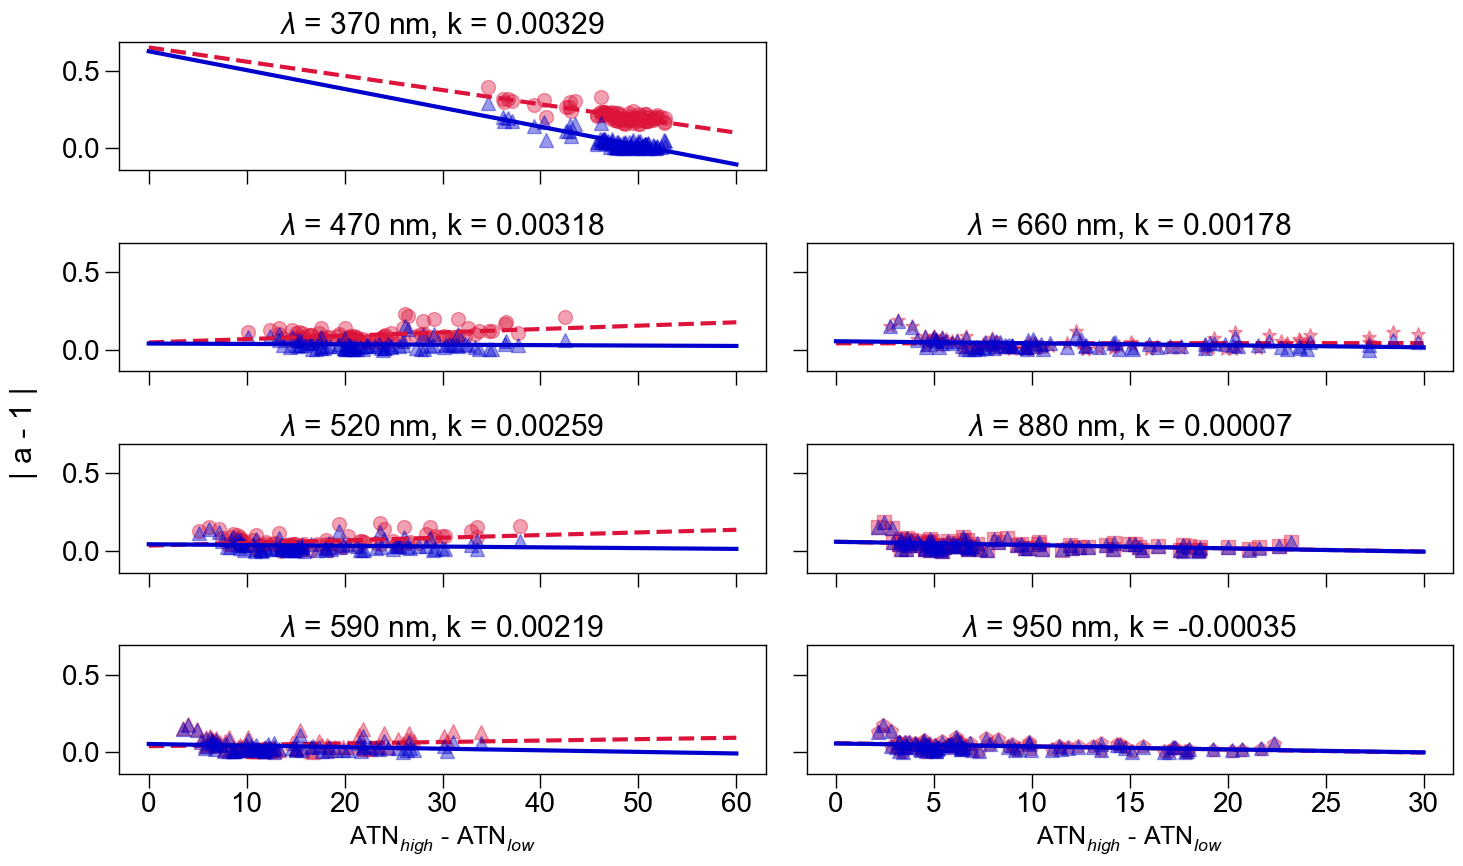

In [46]:
fig, ax = plt.subplots(4,2,sharex='col',sharey=True,figsize=(15,9))

aval = 0.4
x1 = np.linspace(0,60,100)
x2 = np.linspace(0,30,100)

ax[0,0].plot(ss.d1,ss.abs1,'o',color = '#DC143C',alpha = aval)
ax[0,0].plot(ss.d1,ss.abs1_c,'^',alpha = aval,color = '#0000CD')
ax[0,0].plot(x1,x1*s_i[0]+b_i[0],'--',color = '#DC143C')
ax[0,0].plot(x1,x1*s_c[0]+b_c[0],'-',color = '#0000CD')
ax[0,0].set_title('$\lambda$ = {} nm, k = {:.5f}'.format(wl[0],k1))
#ax[0,0].set_ylim([0,1.2])

ax[1,0].plot(ss.d2,ss.abs2,'o',color = '#DC143C',alpha = aval)
ax[1,0].plot(ss.d2,ss.abs2_c,'^',alpha = aval,color ='#0000CD')
ax[1,0].plot(x1,x1*s_i[1]+b_i[1],'--',color = '#DC143C')
ax[1,0].plot(x1,x1*s_c[1]+b_c[1],'-',color = '#0000CD')
ax[1,0].set_title('$\lambda$ = {} nm, k = {:.5f}'.format(wl[1],k2))

ax[2,0].plot(ss.d3,ss.abs3,'o',color = '#DC143C',alpha = aval)
ax[2,0].plot(ss.d3,ss.abs3_c,'^',alpha = aval,color = '#0000CD')
ax[2,0].plot(x1,x1*s_i[2]+b_i[2],'--',color = '#DC143C')
ax[2,0].plot(x1,x1*s_c[2]+b_c[2],'-',color = '#0000CD')
ax[2,0].set_title('$\lambda$ = {} nm, k = {:.5f}'.format(wl[2],k3))

ax[3,0].plot(ss.d4,ss.abs4,'^',color = '#DC143C',alpha = aval)
ax[3,0].plot(x1,x1*s_i[3]+b_i[3],'--',color = '#DC143C')
ax[3,0].plot(ss.d4,ss.abs4_c,'^',alpha = aval,color = '#0000CD')
ax[3,0].plot(x1,x1*s_c[3]+b_c[3],'-',color = '#0000CD')
ax[3,0].set_title('$\lambda$ = {} nm, k = {:.5f}'.format(wl[3],k4))
ax[3,0].set_xlabel('ATN$_{high}$ - ATN$_{low}$')

ax[0,1].axis(False)

ax[1,1].plot(ss.d5,ss.abs5,'*',color = '#DC143C',alpha = aval)
ax[1,1].plot(x2,x2*s_i[4]+b_i[4],'--',color = '#DC143C')
ax[1,1].plot(ss.d5,ss.abs5_c,'^',alpha = aval,color = '#0000CD')
ax[1,1].plot(x2,x2*s_c[4]+b_c[4],'-',color = '#0000CD')
ax[1,1].set_title('$\lambda$ = {} nm, k = {:.5f}'.format(wl[4],k5))

ax[2,1].plot(ss.d6,ss.abs6,'s',color = '#DC143C',alpha = aval)
ax[2,1].plot(x2,x2*s_i[5]+b_i[5],'--',color = '#DC143C')
ax[2,1].plot(ss.d6,ss.abs6_c,'^',alpha = aval,color = '#0000CD')
ax[2,1].plot(x2,x2*s_c[5]+b_c[5],'-',color = '#0000CD')
ax[2,1].set_title('$\lambda$ = {} nm, k = {:.5f}'.format(wl[5],k6))

ax[3,1].plot(ss.d7,ss.abs7,'p',color = '#DC143C',alpha = aval)
ax[3,1].plot(x2,x2*s_i[6]+b_i[6],'--',color = '#DC143C')
ax[3,1].plot(ss.d7,ss.abs7_c,'^',alpha = aval,color='#0000CD')
ax[3,1].plot(x2,x2*s_c[6]+b_c[6],'-',color = '#0000CD')
ax[3,1].set_title('$\lambda$ = {} nm, k = {:.5f}'.format(wl[6],k7))
ax[3,1].set_xlabel('ATN$_{high}$ - ATN$_{low}$')

fig.supylabel('| a - 1 |')

fig.tight_layout()

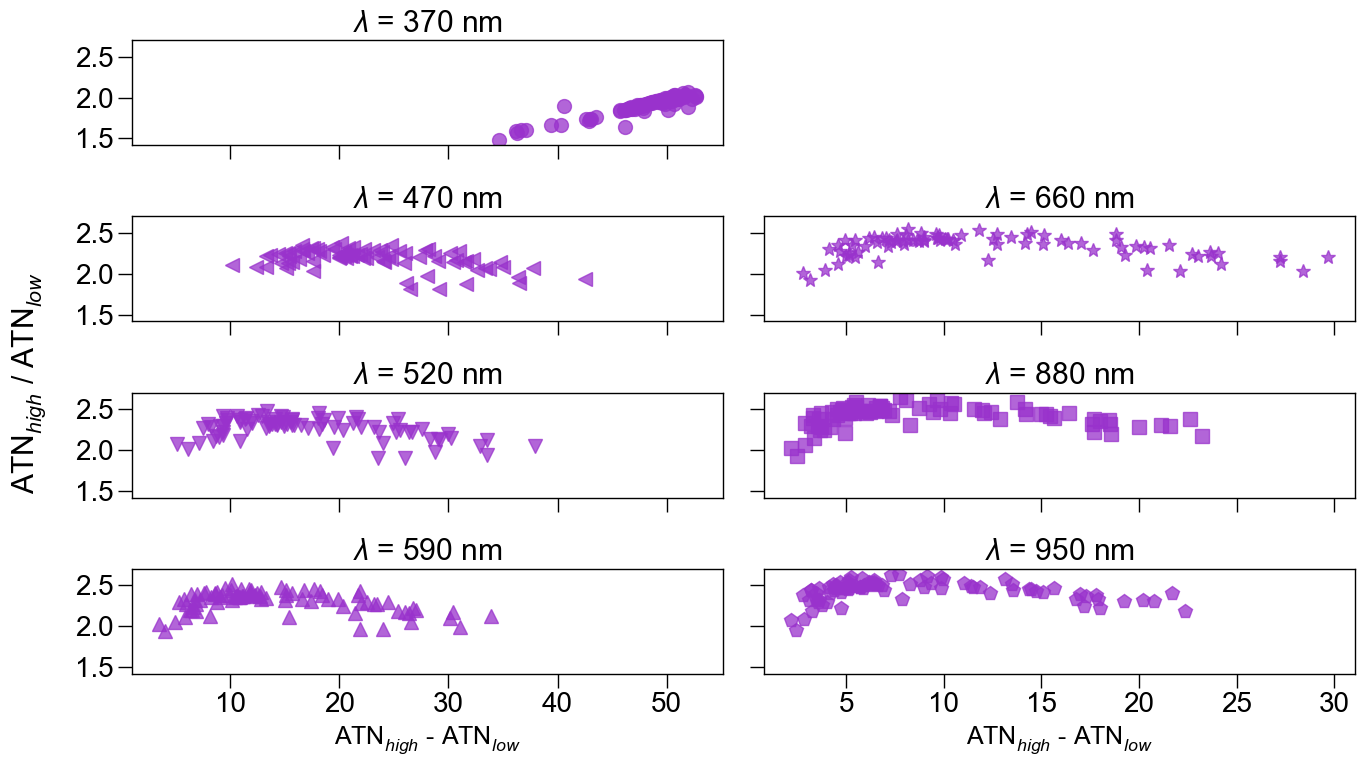

In [50]:
fig, ax = plt.subplots(4,2,sharex='col',sharey=True)

aval = 0.75

ax[0,0].plot(ss.d1,ss.r1,'o',color = '#9932CC',alpha = aval)
ax[0,0].set_title('$\lambda$ = {} nm'.format(wl[0]))

ax[1,0].plot(ss.d2,ss.r2,'<',color = '#9932CC',alpha = aval)
ax[1,0].set_title('$\lambda$ = {} nm'.format(wl[1]))

ax[2,0].plot(ss.d3,ss.r3,'v',color = '#9932CC',alpha = aval)
ax[2,0].set_title('$\lambda$ = {} nm'.format(wl[2]))

ax[3,0].plot(ss.d4,ss.r4,'^',color = '#9932CC',alpha = aval)
ax[3,0].set_title('$\lambda$ = {} nm'.format(wl[3]))
ax[3,0].set_xlabel('ATN$_{high}$ - ATN$_{low}$')

ax[0,1].axis(False)

ax[1,1].plot(ss.d5,ss.r5,'*',color = '#9932CC',alpha = aval)
ax[1,1].set_title('$\lambda$ = {} nm'.format(wl[4]))

ax[2,1].plot(ss.d6,ss.r6,'s',color = '#9932CC',alpha = aval)
ax[2,1].set_title('$\lambda$ = {} nm'.format(wl[5]))

ax[3,1].plot(ss.d7,ss.r7,'p',color = '#9932CC',alpha = aval)
ax[3,1].set_title('$\lambda$ = {} nm'.format(wl[6]))
ax[3,1].set_xlabel('ATN$_{high}$ - ATN$_{low}$')

#fig.text(0.07, 0.3, 'ATN$_{high}$ / ATN$_{low}$', ha='center',rotation='vertical',fontsize = 30,fontweight = 'bold')
fig.supylabel('ATN$_{high}$ / ATN$_{low}$')
fig.tight_layout()

## Calc corrected AAE by channel

In [51]:
#log tranformation of spot sample dataframe
cols = ['dA11_c', 'dA12_c','dA13_c', 'dA14_c','dA15_c','dA16_c','dA17_c']
cols2 = ['dA21_c', 'dA22_c','dA23_c', 'dA24_c','dA25_c','dA26_c','dA27_c']
logATN[cols] = np.log(ss[cols])
logATN[cols2] = np.log(ss[cols2])

In [52]:
X = logWL
X = sm.add_constant(X)
index = list(range(0,len(logATN.index)))
ss['AAE1c'] = np.nan
ss['AAE2c'] = np.nan

for i in index:
    Y1 = logATN[cols].iloc[i]
    Y2 = logATN[cols2].iloc[i]
    
    aae1,al,au = OLSLinRegAAE(X,Y1)
    aae2,bl,bu = OLSLinRegAAE(X,Y2)
    ss['AAE1c'].iloc[i] = aae1
    ss['AAE2c'].iloc[i] = aae2

In [53]:
ss['AAEavg'] = ss[['AAE1c','AAE2c']].mean(axis=1)

## Normalized ATN vs wavelength

In [54]:
cols = ['dA11_c','dA12_c','dA13_c','dA14_c','dA15_c','dA16_c','dA17_c']
cols2 = ['dA21_c','dA22_c','dA23_c','dA24_c','dA25_c','dA26_c','dA27_c']
cols3 = ['dA11','dA12','dA13','dA14','dA15','dA16','dA17']
cols4 = ['dA21','dA22','dA23','dA24','dA25','dA26','dA27']

for col in cols:
    ss[col+'_norm'] = ss[col] / ss.dA17_c
    
for col in cols2:
    ss[col+'_norm'] = ss[col] / ss.dA27_c
    
for col in cols3:
    ss[col+'_norm'] = ss[col] / ss.dA17
    
for col in cols4:
    ss[col+'_norm'] = ss[col] / ss.dA27

In [55]:
c1 = ['dA11_norm','dA21_norm','dA12_norm','dA22_norm','dA13_norm','dA23_norm','dA14_norm',
      'dA24_norm','dA15_norm','dA25_norm','dA16_norm','dA26_norm','dA17_norm','dA27_norm']
c2 = ['dA11_c_norm','dA21_c_norm','dA12_c_norm','dA22_c_norm','dA13_c_norm','dA23_c_norm','dA14_c_norm',
      'dA24_c_norm','dA15_c_norm','dA25_c_norm','dA16_c_norm','dA26_c_norm','dA17_c_norm','dA27_c_norm']
logATN[c1] = np.log(ss[c1])
logATN[c2] = np.log(ss[c2])

X = logWL2
index = list(range(0,len(logATN.index)))

ss['AAEn'] = np.nan
ss['AAEcn'] = np.nan
ss['AAEn_l'] = np.nan
ss['AAEn_u'] = np.nan
ss['AAEcn_l'] = np.nan
ss['AAEcn_u'] = np.nan

for i in index:
    YN = logATN[c1].iloc[i]
    YCN = logATN[c2].iloc[i]
    aae_n,ln,un  = OLSLinRegAAE(X,YN)
    aae_cn,lcn,ucn = OLSLinRegAAE(X,YCN)
    ss['AAEn'].iloc[i] = aae_n
    ss['AAEcn'].iloc[i] = aae_cn
    ss['AAEn_l'].iloc[i] = ln
    ss['AAEn_u'].iloc[i] = un
    ss['AAEcn_l'].iloc[i] = lcn
    ss['AAEcn_u'].iloc[i] = ucn

In [71]:
# aval = 0.5

# fig10, ax10 = plt.subplots()
# ax10.set(xlim=(350,1000),ylim=(0,250))
# ax10.set_xlabel('Wavelength [nm]',fontsize=30,fontweight='bold')
# ax10.set_ylabel('Attenuation ($\Delta$ATN) [ ]',fontsize=30,fontweight='bold')
# ax102 = ax10.twinx()
# ax102.set(ylim=(0.4,1.6))
# ax102.set_ylabel('Artifact Ratio [ ]',fontsize=30,fontweight = 'bold')

# row = ss.iloc[0]
# line1, = ax10.plot(wl,row[['dA11','dA12','dA13','dA14','dA15','dA16','dA17']],'^-',ms=15,label = 'High Flow Spot',alpha = aval,color = '#FF7F50')
# line2, = ax10.plot(wl,row[['dA21','dA22','dA23','dA24','dA25','dA26','dA27']],'s-',ms=15,label = 'Low Flow Spot',alpha = aval,color = '#FF7F50')
# line3, = ax102.plot(wl,row[['a1','a2','a3','a4','a5','a6','a7']],'o--',ms=15,label = 'Artifact Ratio',color='#FF4500')
# line5, = ax10.plot(wl,row[['dA11_c','dA12_c','dA13_c','dA14_c','dA15_c','dA16_c','dA17_c']],'^-',ms=15,label = 'High Flow Spot Corrected',color = '#0000CD',alpha = aval)
# line4, = ax10.plot(wl,row[['dA21_c','dA22_c','dA23_c','dA24_c','dA25_c','dA26_c','dA27_c']],'s-',ms=15,label = 'Low Flow Spot Corrected',color = '#0000CD',alpha = aval)
# line6, = ax102.plot(wl,row[['a1_c','a2_c','a3_c','a4_c','a5_c','a6_c','a7_c']],'o--',ms=15,label = 'Artifact Ratio Corrected',color='#483D8B')
# time_text = ax10.text(600,240,'SAMPLE END: ' + str(row.name),fontsize = 30,fontweight = 'bold')
# AAEu = ax10.text(600,225,'Uncorrected AAE | Low: {:.2f} High: {:.2f}'.format(row.AAE1,row.AAE2),fontsize = 30,fontweight = 'bold',color='#FF7F50')
# AAEc = ax10.text(600,210,'Corrected AAE     | Low: {:.2f} High: {:.2f}'.format(row.AAE1c,row.AAE2c),fontsize = 30,fontweight = 'bold',color = '#0000CD')

# ax10.legend(fontsize = 22,bbox_to_anchor = (0.6,1.15),ncol=2,loc='upper center')
# ax102.legend(fontsize = 22,bbox_to_anchor = (0,1.15),loc='upper left')

# def animate(i):
#     row = ss.iloc[i]
#     line1.set_ydata(row[['dA11','dA12','dA13','dA14','dA15','dA16','dA17']])
#     line2.set_ydata(row[['dA21','dA22','dA23','dA24','dA25','dA26','dA27']])
#     line3.set_ydata(row[['a1','a2','a3','a4','a5','a6','a7']])
#     line4.set_ydata(row[['dA21_c','dA22_c','dA23_c','dA24_c','dA25_c','dA26_c','dA27_c']])
#     line5.set_ydata(row[['dA11_c','dA12_c','dA13_c','dA14_c','dA15_c','dA16_c','dA17_c']])
#     line6.set_ydata(row[['a1_c','a2_c','a3_c','a4_c','a5_c','a6_c','a7_c']])
#     time_text.set_text('SAMPLE END: ' + str(ss.iloc[i].name))
#     AAEu.set_text('Uncorrected AAE | Low: {:.2f} High: {:.2f}'.format(row.AAE1,row.AAE2))
#     AAEc.set_text('Corrected AAE     | Low: {:.2f} High: {:.2f}'.format(row.AAE1c,row.AAE2c))
#     return line1, line2, line3
    
# ani = animation.FuncAnimation(fig10,animate,frames=len(ss.index),blit=False,interval = 1000)
# plt.show()
# ani.save('ATNvsWL_corrected2.mp4',writer='ffmeg')

In [59]:
# aval = 0.5

# fig10, ax10 = plt.subplots()
# ax10.set(xlim=(350,1000),ylim=(0,150))
# ax10.set_xlabel('Wavelength [nm]',fontsize=30,fontweight='bold')
# ax10.set_ylabel('Attenuation ($\Delta$ATN) [ ]',fontsize=30,fontweight='bold')
# ax102 = ax10.twinx()
# ax102.set(ylim=(0.4,1.2))
# ax102.set_ylabel('Artifact Ratio [ ]',fontsize=30,fontweight = 'bold')

# row = ss.iloc[0]
# line1, = ax10.plot(wl,row[['dA11','dA12','dA13','dA14','dA15','dA16','dA17']],'^-',ms=15,label = 'High Flow Spot',alpha = aval,color = '#FF7F50')
# line2, = ax10.plot(wl,row[['dA21','dA22','dA23','dA24','dA25','dA26','dA27']],'s-',ms=15,label = 'Low Flow Spot',alpha = aval,color = '#FF7F50')
# line3, = ax102.plot(wl,row[['a1','a2','a3','a4','a5','a6','a7']],'o--',ms=15,label = 'Artifact Ratio',color='#FF4500')
# #line5, = ax10.plot(wl,row[['dA11_c','dA12_c','dA13_c','dA14_c','dA15_c','dA16_c','dA17_c']],'^-',ms=15,label = 'High Flow Spot Corrected',color = '#0000CD',alpha = aval)
# #line4, = ax10.plot(wl,row[['dA21_c','dA22_c','dA23_c','dA24_c','dA25_c','dA26_c','dA27_c']],'s-',ms=15,label = 'Low Flow Spot Corrected',color = '#0000CD',alpha = aval)
# #line6, = ax102.plot(wl,row[['a1_c','a2_c','a3_c','a4_c','a5_c','a6_c','a7_c']],'o--',ms=15,label = 'Artifact Ratio Corrected',color='#483D8B')
# time_text = ax10.text(600,140,'SAMPLE END: ' + str(row.name),fontsize = 30,fontweight = 'bold')
# AAEu = ax10.text(600,130,'Uncorrected AAE | Low: {:.2f} High: {:.2f}'.format(row.AAE1,row.AAE2),fontsize = 30,fontweight = 'bold',color='#FF7F50')
# #AAEc = ax10.text(600,210,'Corrected AAE     | Low: {:.2f} High: {:.2f}'.format(row.AAE1c,row.AAE2c),fontsize = 30,fontweight = 'bold',color = '#0000CD')

# ax10.legend(fontsize = 22,bbox_to_anchor = (0.7,1.08),ncol=2,loc='upper center')
# ax102.legend(fontsize = 22,bbox_to_anchor = (0.25,1.08),loc='upper left')
# ax102.axhline(y=1,ls='--',color = '#1E90FF')

# def animate(i):
#     row = ss.iloc[i]
#     line1.set_ydata(row[['dA11','dA12','dA13','dA14','dA15','dA16','dA17']])
#     line2.set_ydata(row[['dA21','dA22','dA23','dA24','dA25','dA26','dA27']])
#     line3.set_ydata(row[['a1','a2','a3','a4','a5','a6','a7']])
#     #line4.set_ydata(row[['dA21_c','dA22_c','dA23_c','dA24_c','dA25_c','dA26_c','dA27_c']])
#     #line5.set_ydata(row[['dA11_c','dA12_c','dA13_c','dA14_c','dA15_c','dA16_c','dA17_c']])
#     #line6.set_ydata(row[['a1_c','a2_c','a3_c','a4_c','a5_c','a6_c','a7_c']])
#     time_text.set_text('SAMPLE END: ' + str(ss.iloc[i].name))
#     AAEu.set_text('Uncorrected AAE | Low: {:.2f} High: {:.2f}'.format(row.AAE1,row.AAE2))
#     #AAEc.set_text('Corrected AAE     | Low: {:.2f} High: {:.2f}'.format(row.AAE1c,row.AAE2c))
#     return line1, line2, line3
    
# ani = animation.FuncAnimation(fig10,animate,frames=len(ss.index),blit=False,interval = 1000)
# plt.show()
# ani.save('ATNvsWL_uncorrected_9Dec2021.mp4')

In [60]:
# fig, ax = plt.subplots()
# ax.set_xlabel('Wavelength [nm]',fontsize=30,fontweight='bold')
# ax.set_ylabel('Normalized Attenuation ($\Delta$ATN) [ ]',fontsize=30,fontweight='bold')
# maxi = ss[['dA11_norm','dA11_c_norm','dA21_norm','dA21_c_norm']].iloc[0].max().max()
# row = ss.iloc[0]
# line1, = ax.plot(wl,row[['dA11_norm','dA12_norm','dA13_norm','dA14_norm','dA15_norm','dA16_norm','dA17_norm']],'^-',
#                    alpha = 0.5,ms=15,label = 'High Flow Spot',color = '#FF7F50')
# line2, = ax.plot(wl,row[['dA21_norm','dA22_norm','dA23_norm','dA24_norm','dA25_norm','dA26_norm','dA27_norm']],'s-',
#                    alpha = 0.5,ms=15,label = 'Low Flow Spot',color = '#FF7F50')
# line5, = ax.plot(wl,row[['dA11_c_norm','dA12_c_norm','dA13_c_norm','dA14_c_norm','dA15_c_norm','dA16_c_norm','dA17_c_norm']],'^-',
#                   alpha = 0.5,ms=15,color = '#0000CD', label = 'High Flow Spot Corrected')
# line4, = ax.plot(wl,row[['dA21_c_norm','dA22_c_norm','dA23_c_norm','dA24_c_norm','dA25_c_norm','dA26_c_norm','dA27_c_norm']],'s-',
#                  alpha = 0.5,ms=15,color = '#0000CD',label = 'Low Flow Spot Corrected')
# time_text = fig.text(0.55,0.82,'SAMPLE END: ' + str(row.name),fontsize = 30,fontweight = 'bold')
# AAE1_text = fig.text(0.55,0.77,'AAE normalized: {:.2f}'.format(row.AAEn),fontsize = 30,fontweight = 'bold',color = '#FF7F50')
# AAE2_text = fig.text(0.55,0.72,'AAE corrected & normalized: {:.2f}'.format(row.AAEcn),fontsize = 30,fontweight='bold',color = '#0000CD')
# ax.legend(fontsize = 22,ncol=2,bbox_to_anchor=(0, 1.12), loc='upper left')

# def animate(i):
#     row = ss.iloc[i]
#     maxi = ss[['dA11_norm','dA11_c_norm','dA21_norm','dA21_c_norm']].iloc[i].max().max()
#     ax.set_ylim([0,maxi*1.1])
#     line1.set_ydata(row[['dA11_norm','dA12_norm','dA13_norm','dA14_norm','dA15_norm','dA16_norm','dA17_norm']])
#     line2.set_ydata(row[['dA21_norm','dA22_norm','dA23_norm','dA24_norm','dA25_norm','dA26_norm','dA27_norm']])    
#     line4.set_ydata(row[['dA11_c_norm','dA12_c_norm','dA13_c_norm','dA14_c_norm','dA15_c_norm','dA16_c_norm','dA17_c_norm']])
#     line5.set_ydata(row[['dA21_c_norm','dA22_c_norm','dA23_c_norm','dA24_c_norm','dA25_c_norm','dA26_c_norm','dA27_c_norm']])
#     time_text.set_text('SAMPLE END: ' + str(row.name))
#     AAE1_text.set_text('AAE normalized: {:.2f}'.format(row.AAEn))
#     AAE2_text.set_text('AAE corrected & normalized: {:.2f}'.format(row.AAEcn))
#     return line1,line2,line4,line5

# ani = animation.FuncAnimation(fig,animate,frames=len(ss.index),blit=False,interval = 1000)
# plt.show()
# ani.save('ATNvsWL_correct_normalized.mp4')

# Sample and wavelength specific ATN correction

In [61]:
K = np.zeros([len(ss),len(wl)])
hcol = ['dA11','dA12','dA13','dA14','dA15','dA16','dA17']
lcol = ['dA21','dA22','dA23','dA24','dA25','dA26','dA27']
cols = ['dA11','dA21','dA12','dA22','dA13','dA23','dA14','dA24','dA15','dA25','dA16','dA26','dA17','dA27']

In [62]:
ss[[h + '_sw' for h in hcol]] = np.nan
ss[[l + '_sw' for l in lcol]] = np.nan

In [63]:
for i in range(0,len(ss)):
    for j in range(0,len(wl)):
        ATNh = ss[hcol[j]].iloc[i]
        ATNl = ss[lcol[j]].iloc[i]
        Ql = ss.f2_mu.iloc[i]
        Qh = ss.f1_mu.iloc[i]
        def sampleWaveK(ksw):
            ATNhc = ATNh / (1 - ksw*ATNh)
            ATNlc = ATNl / (1 - ksw*ATNl)
            
            AR = ATNhc/ATNlc*Ql/Qh
            p = abs(AR-1)
            return p
        res = minimize(sampleWaveK,k[j],tol=1e-6)
        K[i,j] = res.x
        
        ss[hcol[j]+'_sw'].iloc[i] = ATNh / (1 - K[i,j]*ATNh)
        ss[lcol[j]+'_sw'].iloc[i] = ATNl / (1 - K[i,j]*ATNl)

In [64]:
dfK = pd.DataFrame(K,index = ss.index,columns = [str(w) for w in wl])

In [65]:
ss[[c + '_sw' for c in cols]]

,dA11_sw,dA21_sw,dA12_sw,dA22_sw,dA13_sw,dA23_sw,dA14_sw,dA24_sw,dA15_sw,dA25_sw,dA16_sw,dA26_sw,dA17_sw,dA27_sw
2021-04-20 12:03:59,265.838967,108.380942,135.819666,55.372826,101.807071,41.506089,82.039536,33.446989,65.291847,26.619062,40.988789,16.710865,38.477209,15.686908
2021-04-20 12:07:31,329.742926,134.169835,91.336245,37.163975,54.171644,22.041995,38.566986,15.692590,28.293194,11.512267,16.170127,6.579491,14.998181,6.102636
2021-04-20 12:38:34,205.106227,82.532824,63.651757,25.612862,43.520829,17.512367,34.746674,13.981731,28.246138,11.365977,19.018623,7.652912,17.800128,7.162602
2021-04-20 12:41:46,154.786387,61.613462,42.428107,16.888703,27.366948,10.893538,21.107005,8.401739,16.708923,6.651062,10.860146,4.322930,10.150808,4.040575
2021-04-20 12:45:35,156.277603,62.731671,37.282850,14.965767,22.779032,9.143766,17.261936,6.929140,13.593987,5.456783,8.997178,3.611571,8.423273,3.381199
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-23 13:28:34,156.099656,64.149457,31.066926,12.767012,17.923822,7.365828,13.787618,5.666047,11.291797,4.640385,7.375437,3.233547,7.835564,3.220039
2021-04-23 13:52:30,162.202883,67.496224,35.834846,14.911667,20.345232,8.466098,14.853294,6.180782,11.528211,4.797142,7.855771,3.268959,7.487062,3.115531
2021-04-23 14:42:11,167.901809,69.435883,33.420488,13.821055,18.109158,7.489049,13.011549,5.380931,10.196915,4.216938,7.428685,3.072135,7.026387,2.905765
2021-04-23 15:02:04,161.294782,68.034259,30.237258,12.754095,16.484415,6.953137,12.085587,5.097708,6.648133,3.440582,5.087672,2.640980,7.077496,2.985292


In [66]:
for h in hcol:
    ss[h+'_swNorm'] = ss[h + '_sw'] / ss.dA17_sw
    
for l in lcol:
    ss[l+'_swNorm'] = ss[l+ '_sw'] / ss.dA27_sw

In [67]:
logATN[[c + '_swNorm' for c in cols]] = np.log(ss[[c + '_swNorm' for c in cols]])

X = logWL2
index = list(range(0,len(logATN.index)))

ss['AAE_swN'] = np.nan
ss['AAE_swN_l'] = np.nan
ss['AAE_swN_u'] = np.nan

for i in index:
    Y = logATN[[c + '_swNorm' for c in cols]].iloc[i]
    aae,l,u  = OLSLinRegAAE(X,Y)
    ss['AAE_swN'].iloc[i] = aae
    ss['AAE_swN_l'].iloc[i] = l
    ss['AAE_swN_u'].iloc[i] = u

In [72]:
# fig, ax = plt.subplots()
# ax.set_xlabel('Wavelength [nm]',fontsize=30,fontweight='bold')
# ax.set_ylabel('Normalized Attenuation ($\Delta$ATN) [ ]',fontsize=30,fontweight='bold')
# maxi = ss[['dA11_norm','dA11_swNorm','dA21_norm','dA21_swNorm']].iloc[0].max().max()
# row = ss.iloc[0]
# line1, = ax.plot(wl,row[[h+'_norm' for h in hcol]],'^-',alpha = 0.5,ms=15,label = 'High Flow Spot',color = '#FF7F50')
# line2, = ax.plot(wl,row[[l+'_norm' for l in lcol]],'s-',alpha = 0.5,ms=15,label = 'Low Flow Spot',color = '#FF7F50')
# line5, = ax.plot(wl,row[[h+'_swNorm'for h in hcol]],'^-',alpha = 0.5,ms=15,color = '#32CD32', label = 'High Flow Spot sample and $\lambda$ corrected')
# line4, = ax.plot(wl,row[[l+'_swNorm' for l in lcol]],'s-',alpha = 0.5,ms=15,color = '#32CD32',label = 'Low Flow Spot sample and $\lambda$ corrected')
# time_text = fig.text(0.4,0.82,'SAMPLE END: ' + str(row.name),fontsize = 30,fontweight = 'bold')
# AAE1_text = fig.text(0.4,0.77,'AAE normalized: {:.2f}'.format(row.AAEn),fontsize = 30,fontweight = 'bold',color = '#FF7F50')
# AAE2_text = fig.text(0.4,0.72,'AAE sample / wl corrected & normalized: {:.2f}'.format(row.AAE_swN),fontsize = 30,fontweight='bold',color = '#32CD32')
# ax.legend(fontsize = 22,ncol=2,bbox_to_anchor=(0, 1.12), loc='upper left')

# def animate(i):
#     row = ss.iloc[i]
#     maxi = ss[['dA11_norm','dA11_swNorm','dA21_norm','dA21_swNorm']].iloc[i].max().max()
#     ax.set_ylim([0,maxi*1.1])
#     line1.set_ydata(row[[h+'_norm' for h in hcol]])
#     line2.set_ydata(row[[l+'_norm' for l in lcol]])    
#     line4.set_ydata(row[[h+'_swNorm'for h in hcol]])
#     line5.set_ydata(row[[l+'_swNorm' for l in lcol]])
#     time_text.set_text('SAMPLE END: ' + str(row.name))
#     AAE1_text.set_text('AAE normalized: {:.2f}'.format(row.AAEn))
#     AAE2_text.set_text('AAE sample / wl corrected & normalized: {:.2f}'.format(row.AAE_swN))
#     return line1,line2,line4,line5

# ani = animation.FuncAnimation(fig,animate,frames=len(ss.index),blit=False,interval = 1000)
# plt.show()
# ani.save('ATNvsWL_norm_SWcorrected_09-29-2021.mp4')

## artifact ratio

In [73]:
ss['a1_sw'] = ss.dA11_sw/ss.dA21_sw*ss.f2_mu/ss.f1_mu
ss['a2_sw'] = ss.dA12_sw/ss.dA22_sw*ss.f2_mu/ss.f1_mu
ss['a3_sw'] = ss.dA13_sw/ss.dA23_sw*ss.f2_mu/ss.f1_mu
ss['a4_sw'] = ss.dA14_sw/ss.dA24_sw*ss.f2_mu/ss.f1_mu
ss['a5_sw'] = ss.dA15_sw/ss.dA25_sw*ss.f2_mu/ss.f1_mu
ss['a6_sw'] = ss.dA16_sw/ss.dA26_sw*ss.f2_mu/ss.f1_mu
ss['a7_sw'] = ss.dA17_sw/ss.dA27_sw*ss.f2_mu/ss.f1_mu

In [74]:
lcol

['dA21', 'dA22', 'dA23', 'dA24', 'dA25', 'dA26', 'dA27']

In [76]:
# un = '#FF7F50'
# cor = '#32CD32'

# fig, ax = plt.subplots()
# ax.set_xlabel('Wavelength [nm]',fontsize=36,fontweight='bold')
# ax.set_ylabel('Normalized Attenuation ($\Delta$ATN) [ ]',fontsize=36,fontweight='bold')

# ax2 = ax.twinx()
# ax2.set(ylim=(0.4,1.2))
# ax.set(ylim=(0.8,7.8))
# ax2.set_ylabel('Flow normalized attenuation ratio [ ]',fontsize=36,fontweight = 'bold')

# row = ss.iloc[0]
# line1, = ax.plot(wl,row[[h+'_norm' for h in hcol]],'^-',alpha = 0.5,ms=22,label = 'High Flow Spot',color = un,lw=5)
# line2, = ax.plot(wl,row[[l+'_norm' for l in lcol]],'s-',alpha = 0.5,ms=22,label = 'Low Flow Spot',color = un,lw=5)
# line3, = ax2.plot(wl,row[['a1','a2','a3','a4','a5','a6','a7']],'o--',ms=22,label = 'Artifact Ratio',color= un,zorder = 5,lw=5)
# ax2.axhline(y=1,ls='--',color = '#1E90FF',lw=4,zorder = 0)
# #text = ax.text('Uncorrected',fontsize)
# #hf = ax.annotate('High flow spot sample',xy=(470,row.dA22_norm),xytext=(500,row.dA22_norm+0.25),arrowprops = dict(facecolor='black'),fontsize=30)
# #lf = ax.annotate('Low flow spot sample',xy=(470,row.dA12_norm),xytext=(380,row.dA12_norm-0.25),arrowprops = dict(facecolor='black'),fontsize=30)
# #fnar = ax2.annotate('Flow normalized attenuation ratio',xy=(660,row.a5),xytext=(700,row.a5-0.1),arrowprops = dict(facecolor='black'),fontsize=30,zorder=15)

# def animate(i):
#     if (i%2==0):
#         line1.set_color(un)
#         line1.set_ydata(row[[h+'_norm' for h in hcol]])
#         line2.set_color(un)
#         line2.set_ydata(row[[l+'_norm' for l in lcol]])
#         line3.set_color(un)
#         line3.set_ydata(row[['a1','a2','a3','a4','a5','a6','a7']])
#         #hf.set(position=(470,row.dA22_norm))#,anncoords=(500,row.dA22_norm+0.25))
#         #lf.set(position=(470,row.dA12_norm))#,anncoords=(700,row.a5-0.1))
#         #fnar.set(position=(660,row.a5))#,anncoords=(700,row.a5-0.1))
#     else:
#         line1.set_color(cor)
#         line1.set_ydata(row[[h+'_swNorm' for h in hcol]])
#         line2.set_color(cor)
#         line2.set_ydata(row[[l+'_swNorm' for l in lcol]])
#         line3.set_color(cor)
#         line3.set_ydata(row[['a1_sw','a2_sw','a3_sw','a4_sw','a5_sw','a6_sw','a7_sw']])
#         #hf.set(position=(470,row.dA22_swNorm))#,anncoords=(500,row.dA22_norm+0.25))
#         #lf.set(position=(660,row.dA12_swNorm))#,anncoords=(700,row.a5-0.1))
#         #fnar.set(position=(660,row.a5_sw))#,anncoords=(700,row.a5-0.1))
        
        
# ani = animation.FuncAnimation(fig,animate,frames=30,blit=False,interval = 2000)
# plt.show()
# fig.tight_layout()
# ani.save('ATN_twoframes.mp4')

In [78]:
for i in range(len(hcol)):
    l = lcol[i]
    h = hcol[i]
    ss['AD' + str(i+1)] = abs(ss[h+'_norm'] - ss[l+'_norm'])
    ss['AD' + str(i+1)+'C'] = abs(ss[h+'_c_norm'] - ss[l+'_c_norm'])
    ss['AD' + str(i+1)+'SW'] = abs(ss[h+'_swNorm'] - ss[l+'_swNorm'])

In [90]:
def set_axis_style(ax, labels):
    ax.xaxis.set_tick_params(direction='out')
    ax.xaxis.set_ticks_position('bottom')
    ax.set_xticks(np.arange(1, len(labels) + 1))
    ax.set_xticklabels(labels)
    ax.set_xlim(0.25, len(labels) + 0.75)

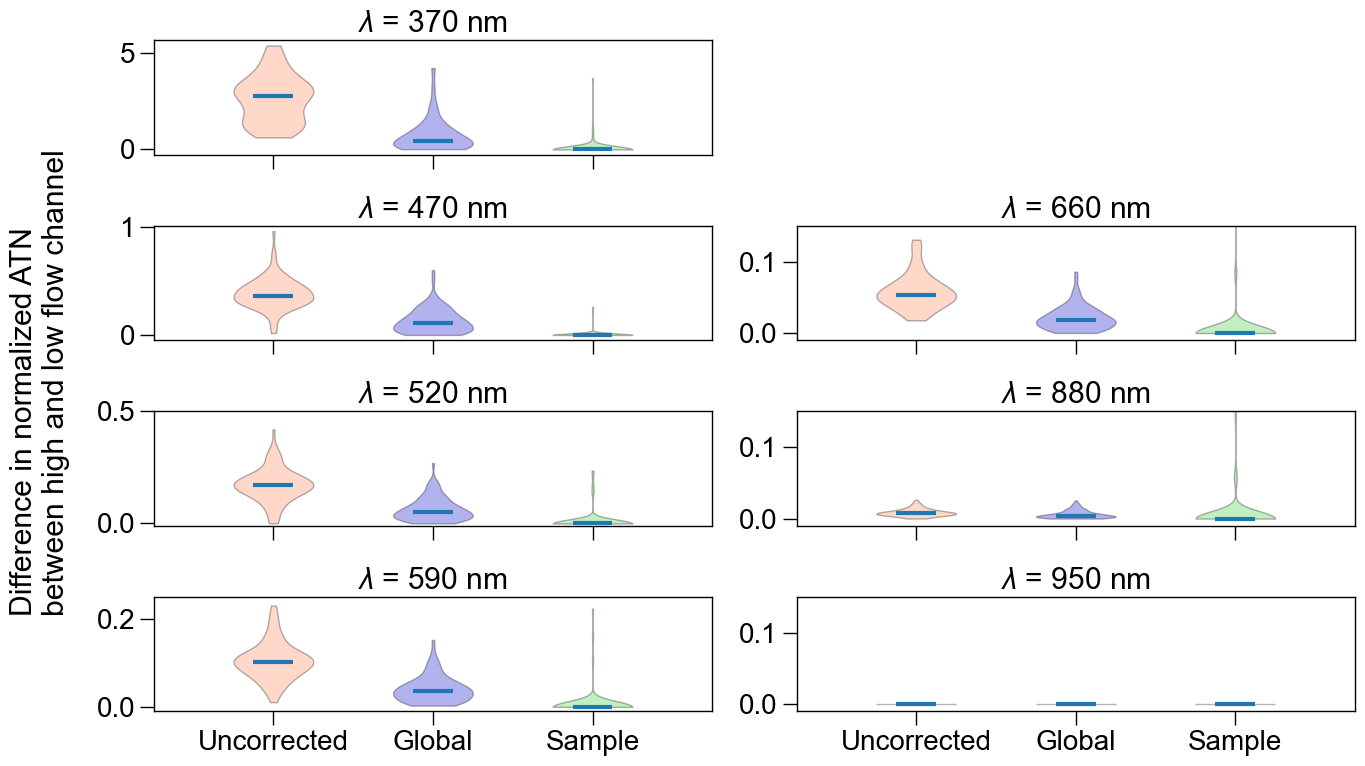

In [91]:
n = '#FF7F50'
cn = '#0000CD'
sw = '#32CD32'
colors = [n,cn,sw]
labels = ['Uncorrected','Global','Sample']

fig, ax = plt.subplots(4,2,sharex=True)

v1 = ax[0,0].violinplot(ss[['AD1','AD1C','AD1SW']],showmedians = True,showextrema=False)
v2 = ax[1,0].violinplot(ss[['AD2','AD2C','AD2SW']],showmedians=True,showextrema=False)
v3 = ax[2,0].violinplot(ss[['AD3','AD3C','AD3SW']],showmedians=True,showextrema=False)
v4 = ax[3,0].violinplot(ss[['AD4','AD4C','AD4SW']],showmedians=True,showextrema=False)
v5 = ax[1,1].violinplot(ss[['AD5','AD5C','AD5SW']],showmedians=True,showextrema=False)
v6 = ax[2,1].violinplot(ss[['AD6','AD6C','AD6SW']],showmedians=True,showextrema=False)
v7 = ax[3,1].violinplot(ss[['AD7','AD7C','AD7SW']], showmedians=True,showextrema=False)

bodies = [v1,v2,v3,v4,v5,v6,v7]

for b in bodies:
    for i,c in enumerate(colors):
        b['bodies'][i].set_color(c)
        b['bodies'][i].set_edgecolor('k')
        
ax[0,1].axis(False)

set_axis_style(ax[3,0], labels)
set_axis_style(ax[3,1],labels)


ax[0,0].set_title('$\lambda$ = {} nm'.format(wl[0]))
ax[1,0].set_title('$\lambda$ = {} nm'.format(wl[1]))
ax[2,0].set_title('$\lambda$ = {} nm'.format(wl[2]))
ax[2,0].set_ylim([-0.01,0.5])
ax[3,0].set_title('$\lambda$ = {} nm'.format(wl[3]))
ax[3,0].set_ylim([-0.01,0.25])
ax[1,1].set_title('$\lambda$ = {} nm'.format(wl[4]))
ax[1,1].set_ylim([-0.01,0.15])
ax[2,1].set_title('$\lambda$ = {} nm'.format(wl[5]))
ax[2,1].set_ylim([-0.01,0.15])
ax[3,1].set_title('$\lambda$ = {} nm'.format(wl[6]))
ax[3,1].set_ylim([-0.01,0.15])

fig.supylabel('Difference in normalized ATN \nbetween high and low flow channel')

fig.tight_layout()

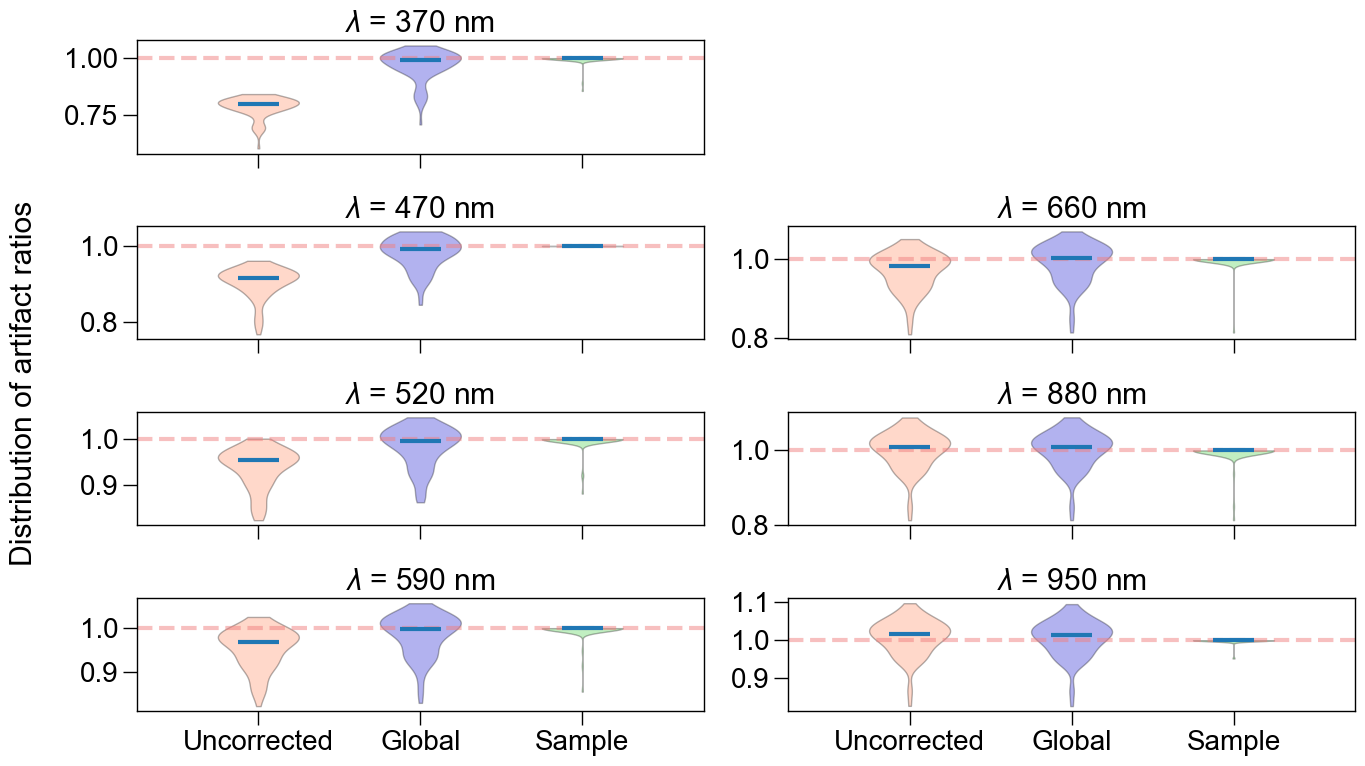

In [92]:
fig, ax = plt.subplots(4,2,sharex=True)

a=0.5
ax[0,0].axhline(y=1,alpha=a,color='#F08080',ls='--')
ax[1,0].axhline(y=1,alpha=a,color='#F08080',ls='--')
ax[2,0].axhline(y=1,alpha=a,color='#F08080',ls='--')
ax[3,0].axhline(y=1,alpha=a,color='#F08080',ls='--')
ax[1,1].axhline(y=1,alpha=a,color='#F08080',ls='--')
ax[2,1].axhline(y=1,alpha=a,color='#F08080',ls='--')
ax[3,1].axhline(y=1,alpha=a,color='#F08080',ls='--')

v1 = ax[0,0].violinplot(ss[['a1','a1_c','a1_sw']],showmedians =True,showextrema=False)
v2 = ax[1,0].violinplot(ss[['a2','a2_c','a2_sw']],showmedians=True,showextrema=False)
v3 = ax[2,0].violinplot(ss[['a3','a3_c','a3_sw']],showmedians=True,showextrema=False)
v4 = ax[3,0].violinplot(ss[['a4','a4_c','a4_sw']],showmedians=True,showextrema=False)
v5 = ax[1,1].violinplot(ss[['a5','a5_c','a5_sw']],showmedians=True,showextrema=False)
v6 = ax[2,1].violinplot(ss[['a6','a6_c','a6_sw']],showmedians=True,showextrema=False)
v7 = ax[3,1].violinplot(ss[['a7','a7_c','a7_sw']],showmedians=True,showextrema=False)

bodies = [v1,v2,v3,v4,v5,v6,v7]

for b in bodies:
    for i,c in enumerate(colors):
        b['bodies'][i].set_color(c)
        b['bodies'][i].set_edgecolor('k')
        
ax[0,1].axis(False)

set_axis_style(ax[3,0],labels)
set_axis_style(ax[3,1],labels)


ax[0,0].set_title('$\lambda$ = {} nm'.format(wl[0]))
ax[1,0].set_title('$\lambda$ = {} nm'.format(wl[1]))
ax[2,0].set_title('$\lambda$ = {} nm'.format(wl[2]))
ax[3,0].set_title('$\lambda$ = {} nm'.format(wl[3]))
ax[1,1].set_title('$\lambda$ = {} nm'.format(wl[4]))
ax[2,1].set_title('$\lambda$ = {} nm'.format(wl[5]))
ax[3,1].set_title('$\lambda$ = {} nm'.format(wl[6]))

fig.supylabel('Distribution of artifact ratios')
fig.tight_layout()
#fig.savefig('violin_artifactRatio.png')

In [88]:
ss['diffAAE'] = abs(ss.AAE1 - ss.AAE2)
ss['diffAAE_c'] = abs(ss.AAE1c-ss.AAE2c)

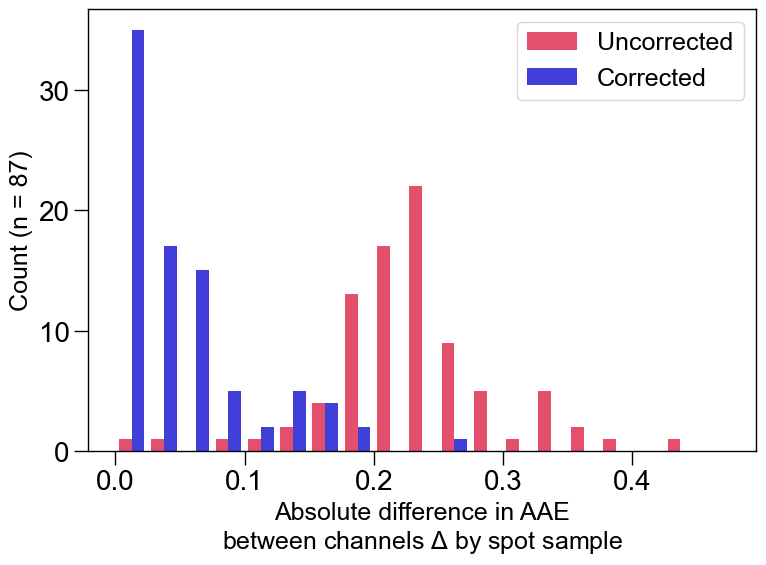

In [97]:
bins1 = np.arange(0,0.5,0.025).tolist()

fig, ax = plt.subplots(figsize=(8,6))

ax.hist(x=[ss.diffAAE,ss.diffAAE_c],bins = bins1, align='mid',color = ['#DC143C','#0000CD'],alpha = 0.75,label = ['Uncorrected','Corrected'])
ax.set_xlabel('Absolute difference in AAE\nbetween channels $\Delta\alpha$ by spot sample')
ax.set_ylabel(r'Count (n = 87)')
ax.legend()

fig.tight_layout()

# Plot of AAE versus MCE

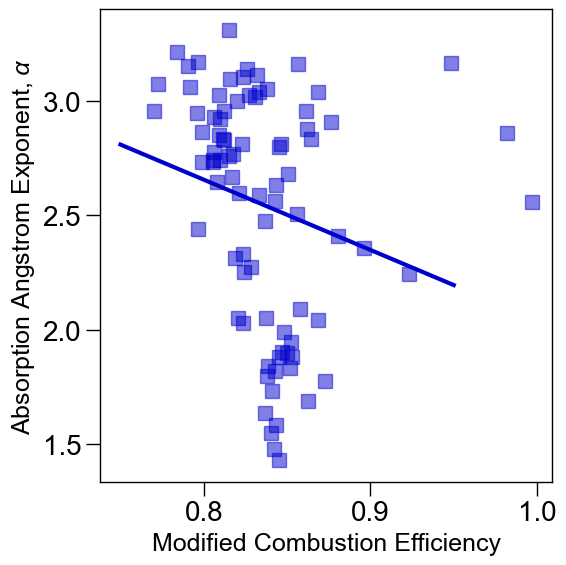

In [117]:
s,b,r2,s_l,s_u,b_l,b_u = linRegConstCI(ss.MCE_mu,ss.AAE_swN)

x = np.linspace(0.75,0.95,100)

figCE, axCE = plt.subplots(figsize=(6,6))

axCE.plot(ss.MCE_mu,ss.AAE_swN,'s',color = '#0000CD',zorder = 0,alpha = 0.5,label = 'Normalized and Corrected')
axCE.plot(x,x*s+b,'-',ms=15,zorder = 10,color = '#0000CD')
#axCE.plot(x,x*(s-r.bse.MCE_mu)+b-r.bse.const,'--',color = '#0000CD')
#axCE.plot(x,x*(s+r.bse.MCE_mu)+b+r.bse.const,'--',color = '#0000CD')

axCE.set_ylabel('Absorption Angstrom Exponent, ' + r'$\alpha$')
axCE.set_xlabel('Modified Combustion Efficiency')
#axCE.legend(fontsize = 22)

figCE.tight_layout()
#figCE.savefig('AAE_vs_MCE_corr.jpg')

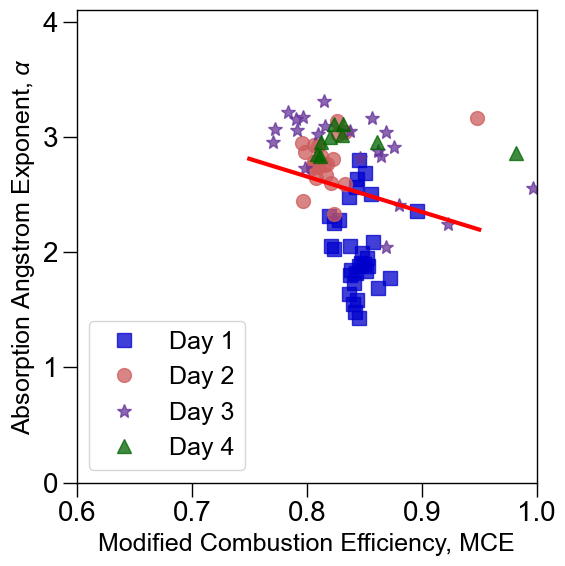

In [118]:
fig, ax = plt.subplots(figsize=(6,6))

ax.set_xlim([0,1])
ax.set_ylim([0,4.1])
d1 = ss.loc[d1be:d1E]
ax.plot(d1.MCE_mu,d1.AAE_swN,'s',color = '#0000CD',zorder = 0,alpha = 0.75,label = 'Day 1')
d2 = ss.loc[d2S:d2E]
ax.plot(d2.MCE_mu,d2.AAE_swN,'o',color = '#CD5C5C',zorder = 0,alpha = 0.75,label = 'Day 2')
d3 = ss.loc[d3S:d3e]
ax.plot(d3.MCE_mu,d3.AAE_swN,'*',color = '#663399',zorder = 0,alpha = 0.75,label = 'Day 3')
d4 = ss.loc[d4c:d4e]
ax.plot(d4.MCE_mu,d4.AAE_swN,'^',color = '#006400',zorder = 0,alpha = 0.75,label = 'Day 4')
ax.plot(x,x*s+b,'-r',ms=15,zorder = 10)

ax.legend(loc='lower left')
ax.set_ylabel('Absorption Angstrom Exponent, ' + r'$\alpha$')
ax.set_xlabel('Modified Combustion Efficiency, MCE')
ax.set_xlim([0.6,1])

fig.tight_layout()
#fig.savefig('AAE_vs_MCE_corr_byDay.jpg')

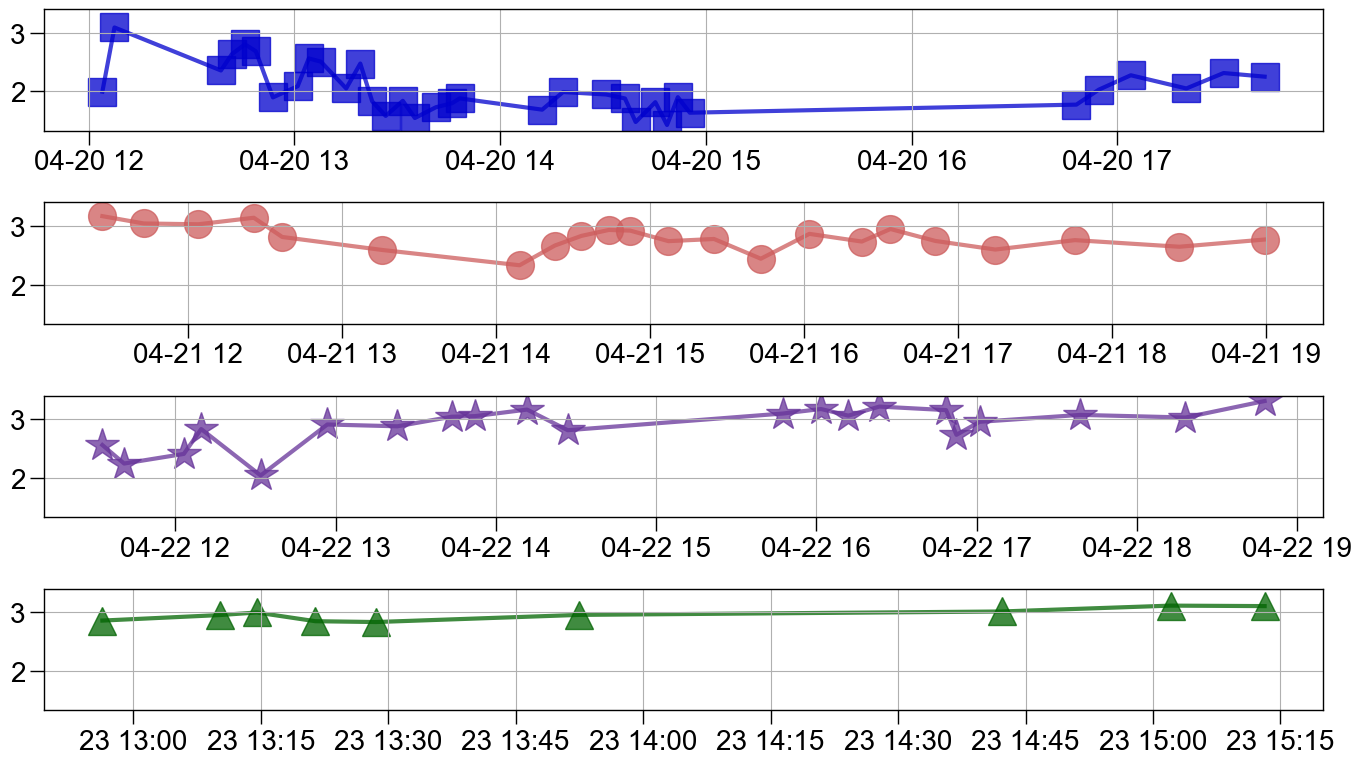

In [119]:
fig,ax = plt.subplots(4,1,sharey=True)

d1 = ss.loc[d1be:d1E]
ax[0].plot(d1.index,d1.AAE_swN,'s-',color = '#0000CD',ms = 20,zorder = 0,alpha = 0.75,label = 'Day 1')
d2 = ss.loc[d2S:d2E]
ax[1].plot(d2.index,d2.AAE_swN,'o-',color = '#CD5C5C',ms = 20,zorder = 0,alpha = 0.75,label = 'Day 2')
d3 = ss.loc[d3S:d3e]
ax[2].plot(d3.index,d3.AAE_swN,'*-',color = '#663399',ms = 25,zorder = 0,alpha = 0.75,label = 'Day 3')
d4 = ss.loc[d4c:d4e]
ax[3].plot(d4.index,d4.AAE_swN,'^-',color = '#006400',ms = 20,zorder = 0,alpha = 0.75,label = 'Day 4')

for i in np.arange(4):
    ax[i].grid(True)
    
fig.tight_layout()

## Histogram of normalized and corrected AAEs

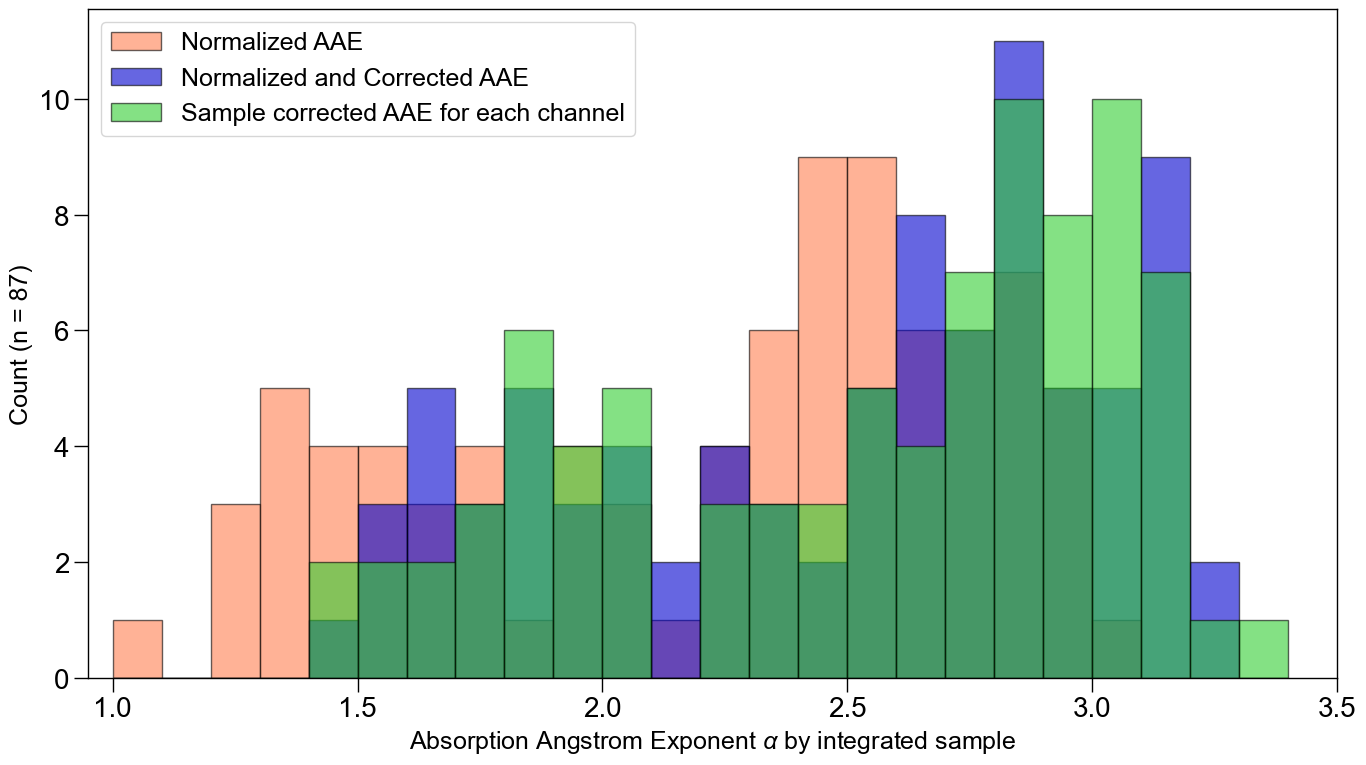

In [120]:
binsAAE = np.arange(1,3.5,0.1).tolist()
lab = ['Normalized AAE','Normalized and Corrected AAE','Sample corrected AAE for each channel']

a = 0.6
fig, ax = plt.subplots()

ax.hist(ss.AAEn,bins=binsAAE,color ='#FF7F50',alpha = a,label = lab[0],edgecolor='k')
ax.hist(ss.AAEcn,bins=binsAAE,color='#0000CD',alpha=a,label = lab[1],edgecolor='k')
ax.hist(ss.AAE_swN,bins=binsAAE,color='#32CD32',alpha=a,label = lab[2],edgecolor='k')
ax.legend()
ax.set_xlabel(r'Absorption Angstrom Exponent $\alpha$ by integrated sample')
ax.set_ylabel(r'Count (n = 87)')
ax.set_xlim([0.95,3.5])

fig.tight_layout()
#fig.savefig('AAE_histo_normalized_correctmethods.png')

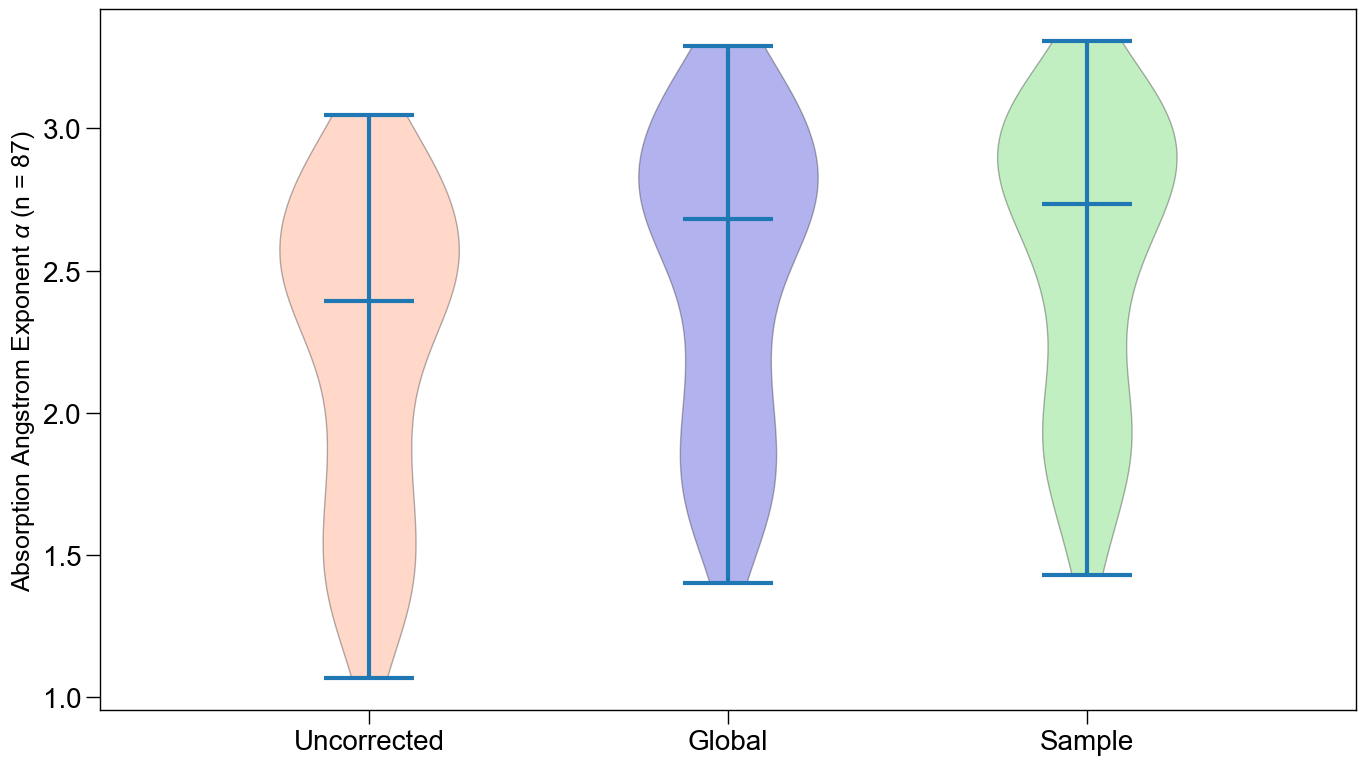

In [122]:
fig,ax = plt.subplots()

v = ax.violinplot(ss[['AAEn','AAEcn','AAE_swN']],showmedians =True,showextrema=True)

for i,c in enumerate(colors):
    v['bodies'][i].set_color(c)
    v['bodies'][i].set_edgecolor('k')

ax.set_ylabel(r'Absorption Angstrom Exponent $ \alpha $ (n = 87)')
set_axis_style(ax,labels)
fig.tight_layout()
#fig.savefig('violinAAE.png')

In [124]:
AAE = ss[['AAEcn','AAE_swN','AAE_swN_l','AAE_swN_u']] #save the global corrected AAE 'AAEcn' and sample/wavelength corrected AAE with CIs

# save all calculated AAE by different correction schemes
path = '/Users/jdabutler/Documents/+github/rx burn/AAE datasets/'
AAE.to_csv(path + 'correctedAAE_test.csv')

# Compensation parameters versus AAE

Text(0.5, 0.08, 'Modified combustion efficiency')

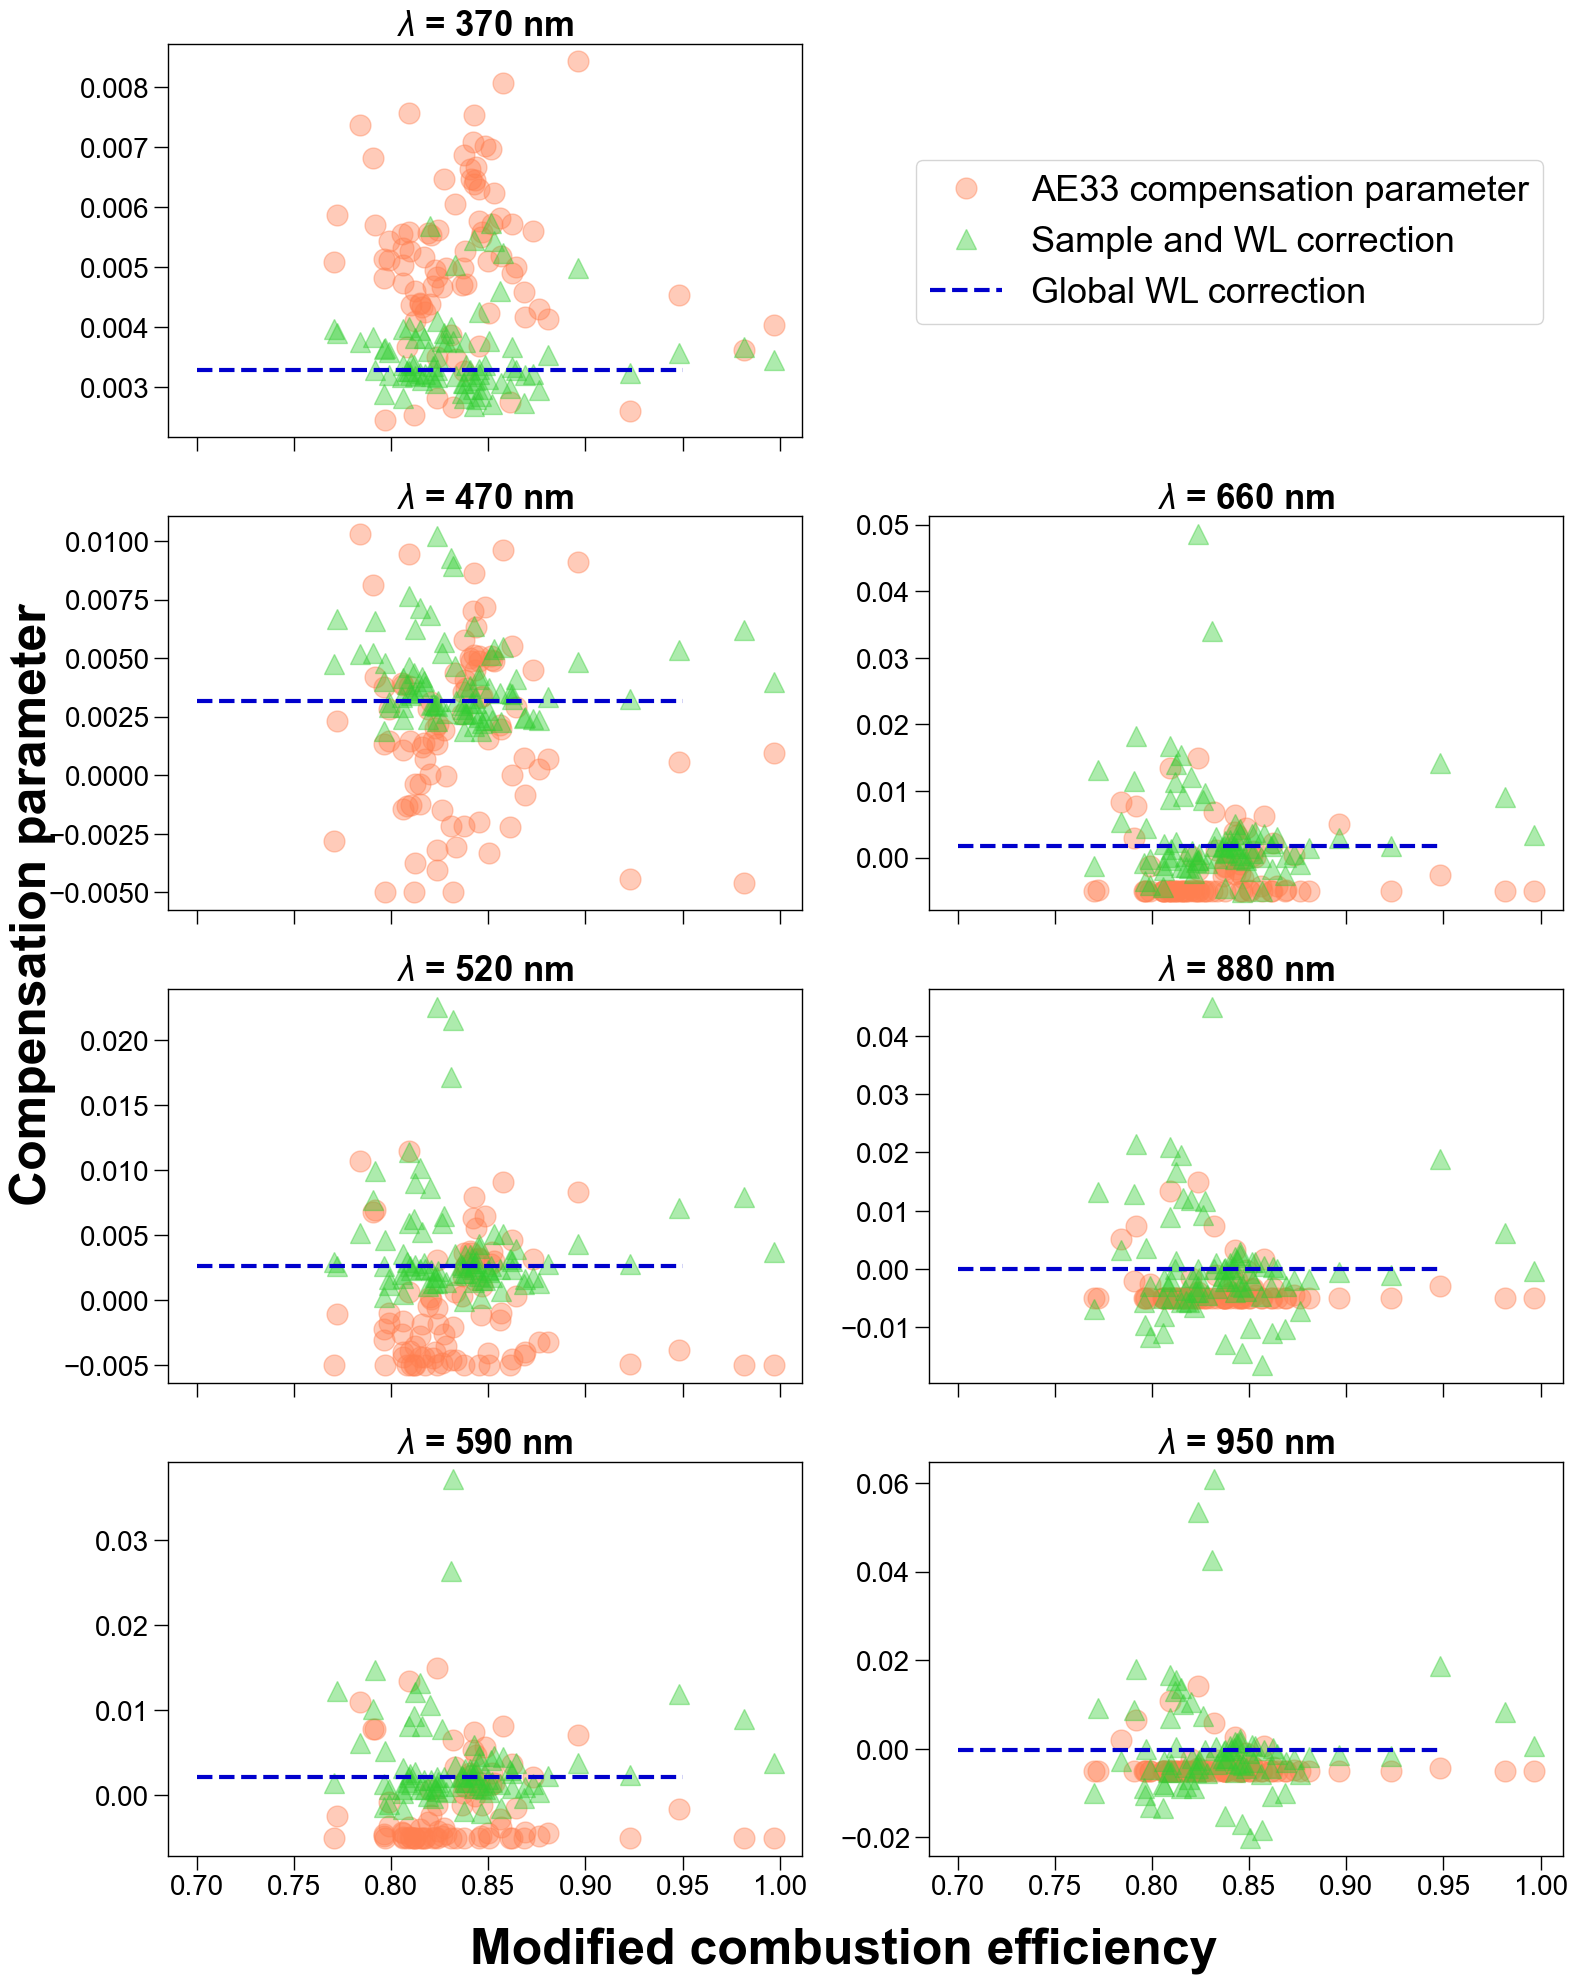

In [127]:
x = [0.7,0.95]
n = '#FF7F50'
cn = '#0000CD'
sw = '#32CD32'
h = '#BA55D3'
alp = 0.4

fig,ax = plt.subplots(4,2,sharex='col',figsize=(18,24))

ax[0,0].plot(ss.MCE_mu,ss.k1_mu,'o',ms=15,alpha = alp,c=n,label='AE33 compensation parameter')
ax[0,0].plot(ss.MCE_mu,dfK['370'],'^',ms=15,c=sw,alpha = alp,label='Sample and WL correction')
ax[0,0].plot(x,[k1,k1],'--',c=cn,label='Global WL correction')
ax[0,0].legend(ncol = 1,fontsize = 26,bbox_to_anchor=(1.15,0.75))

ax[1,0].plot(ss.MCE_mu,ss.k2_mu,'o',ms=15,alpha = alp,c=n)
ax[1,0].plot(ss.MCE_mu,dfK['470'],'^',ms=15,c=sw,alpha = alp)
ax[1,0].plot(x,[k2,k2],'--',c=cn)

ax[2,0].plot(ss.MCE_mu,ss.k3_mu,'o',ms=15,alpha = alp,c=n)
ax[2,0].plot(ss.MCE_mu,dfK['520'],'^',ms=15,c=sw,alpha = alp)
ax[2,0].plot(x,[k3,k3],'--',c=cn)

ax[3,0].plot(ss.MCE_mu,ss.k4_mu,'o',ms=15,alpha = alp,c=n)
ax[3,0].plot(ss.MCE_mu,dfK['590'],'^',ms=15,c=sw,alpha = alp)
ax[3,0].plot(x,[k4,k4],'--',c=cn)

ax[0,1].axis(False)

ax[1,1].plot(ss.MCE_mu,ss.k5_mu,'o',ms=15,alpha = alp,c=n)
ax[1,1].plot(ss.MCE_mu,dfK['660'],'^',ms=15,c=sw,alpha = alp)
ax[1,1].plot(x,[k5,k5],'--',c=cn)

ax[2,1].plot(ss.MCE_mu,ss.k6_mu,'o',ms=15,alpha = alp,c=n)
ax[2,1].plot(ss.MCE_mu,dfK['880'],'^',ms=15,c=sw,alpha = alp)
ax[2,1].plot(x,[k6,k6],'--',c=cn)

ax[3,1].plot(ss.MCE_mu,ss.k7_mu,'o',ms=15,alpha = alp,c=n)
ax[3,1].plot(ss.MCE_mu,dfK['950'],'^',ms=15,c=sw,alpha = alp)
ax[3,1].plot(x,[k7,k7],'--',c=cn)

#titles
ax[0,0].set_title('$\lambda$ = {} nm'.format(wl[0]),fontsize=25,fontweight = 'bold')
ax[1,0].set_title('$\lambda$ = {} nm'.format(wl[1]),fontsize=25,fontweight = 'bold')
ax[2,0].set_title('$\lambda$ = {} nm'.format(wl[2]),fontsize=25,fontweight = 'bold')
ax[3,0].set_title('$\lambda$ = {} nm'.format(wl[3]),fontsize=25,fontweight = 'bold')
ax[1,1].set_title('$\lambda$ = {} nm'.format(wl[4]),fontsize=25,fontweight = 'bold')
ax[2,1].set_title('$\lambda$ = {} nm'.format(wl[5]),fontsize=25,fontweight = 'bold')
ax[3,1].set_title('$\lambda$ = {} nm'.format(wl[6]),fontsize=25,fontweight = 'bold')

fig.text(0.05, 0.4, 'Compensation parameter', ha='center',rotation='vertical',fontsize = 36,fontweight = 'bold')
fig.text(0.5, 0.08, 'Modified combustion efficiency', ha='center',fontsize = 36,fontweight = 'bold')

#fig.savefig('compParam_vs_MCE.png')

Text(0.5, 0.08, 'Modified combustion efficiency')

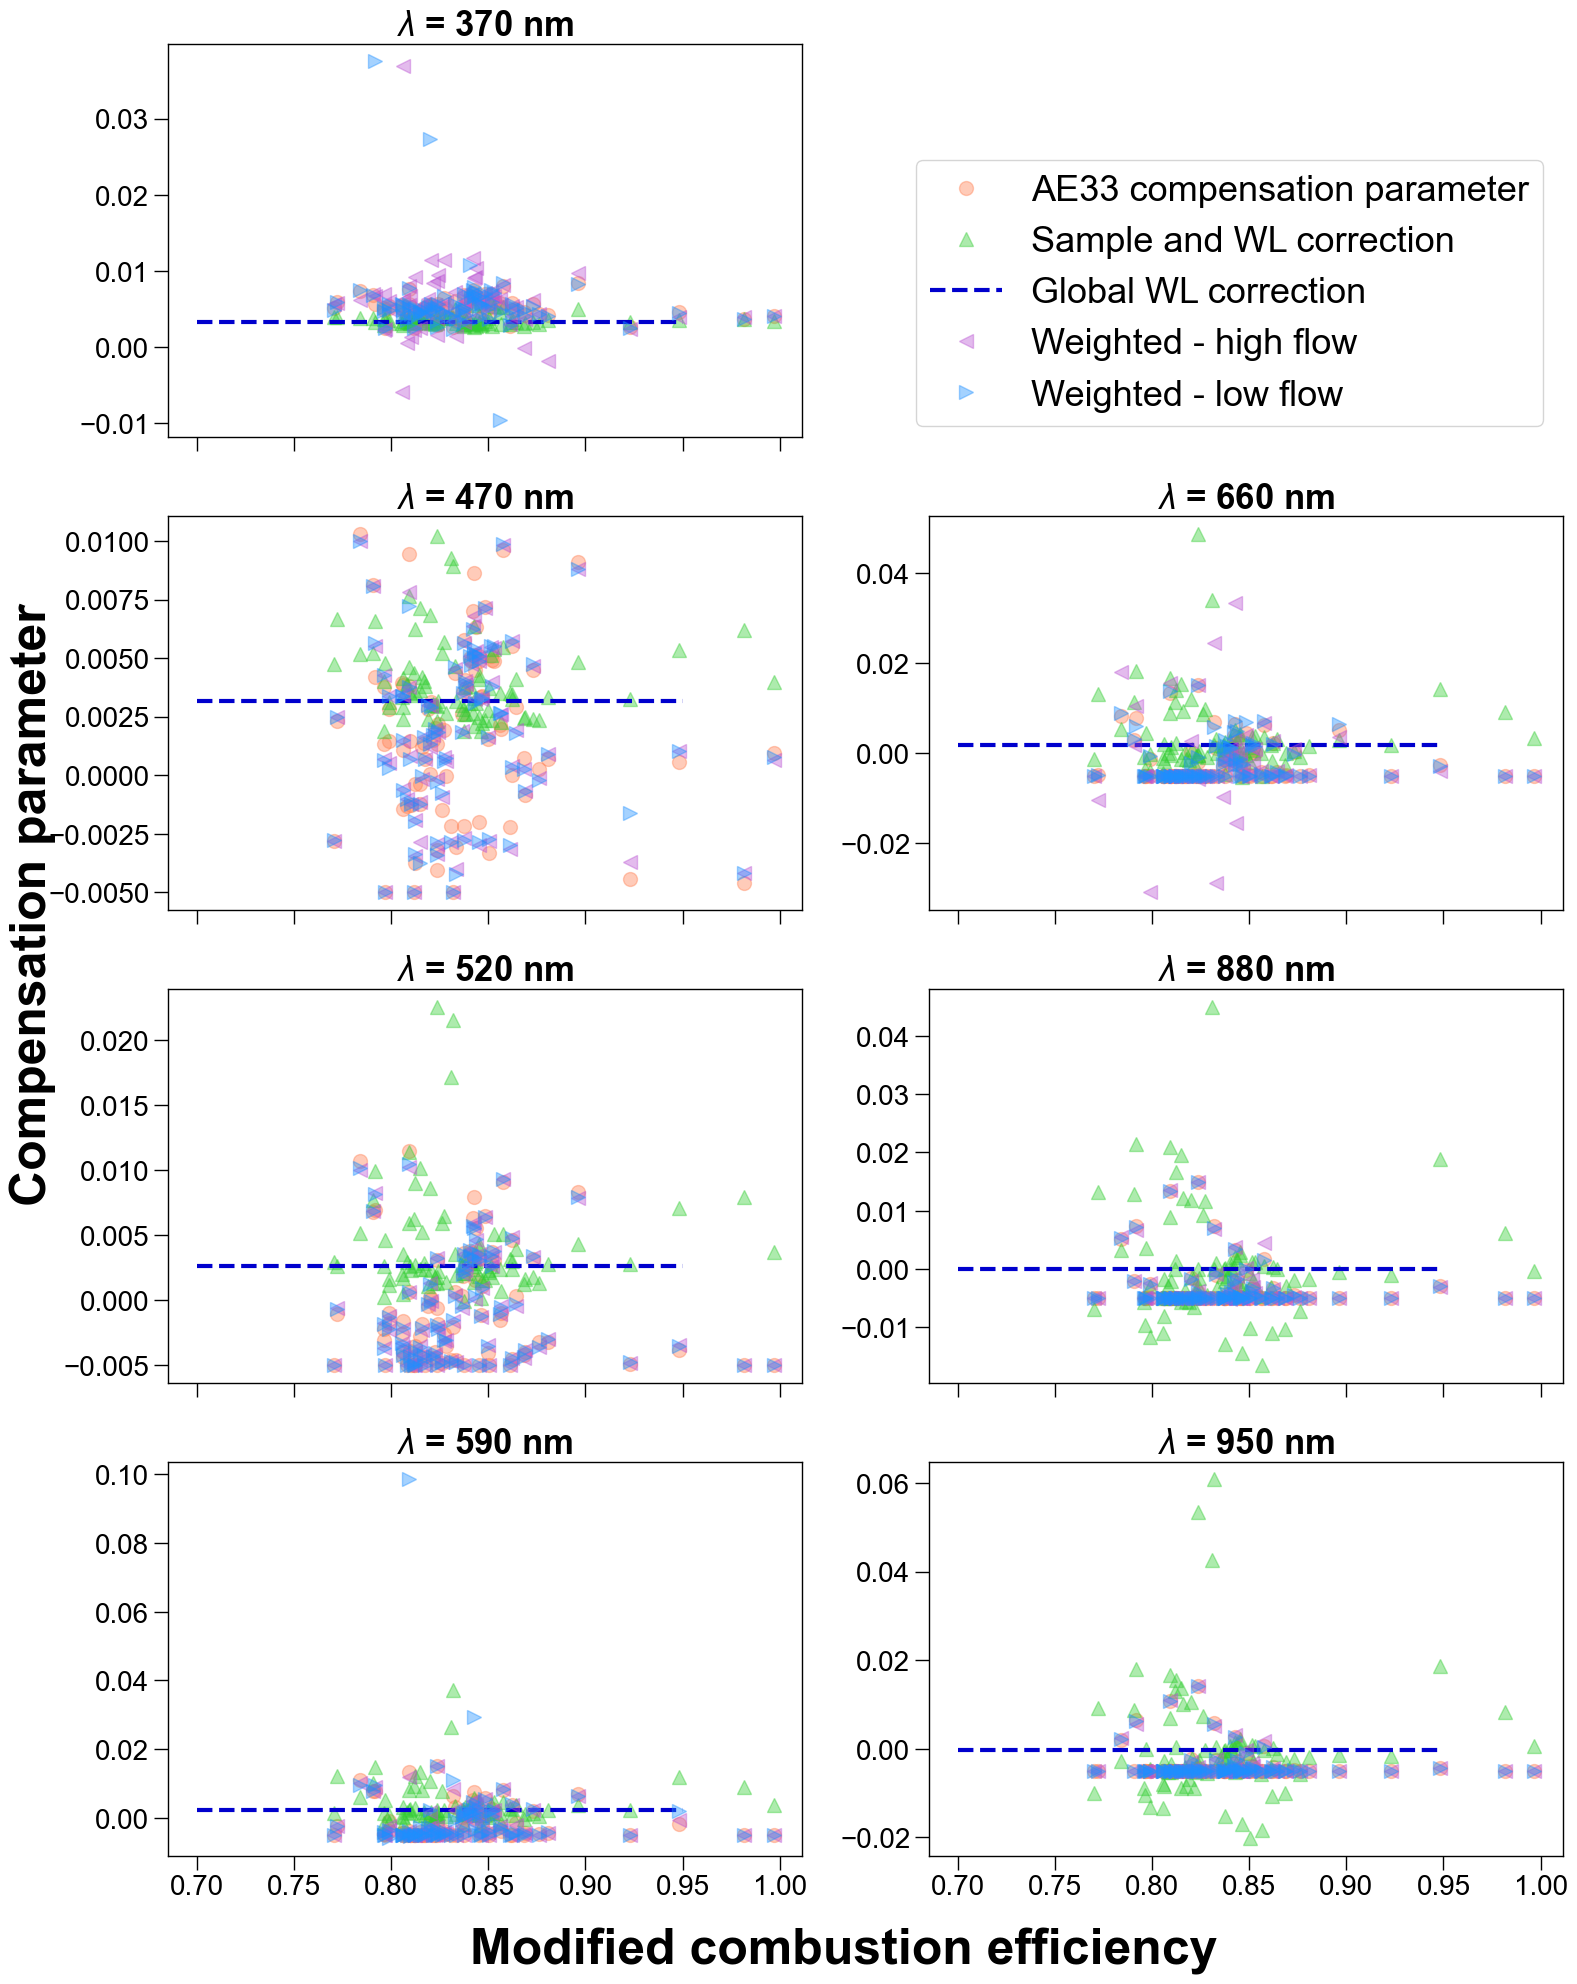

In [128]:
x = [0.7,0.95]
n = '#FF7F50'
cn = '#0000CD'
sw = '#32CD32'
h = '#BA55D3'
l = '#1E90FF'
alp = 0.4

fig,ax = plt.subplots(4,2,sharex='col',figsize=(18,24))

ax[0,0].plot(ss.MCE_mu,ss.k1_mu,'o',ms=10,alpha = alp,c=n,label='AE33 compensation parameter')
ax[0,0].plot(ss.MCE_mu,dfK['370'],'^',ms=10,c=sw,alpha = alp,label='Sample and WL correction')
ax[0,0].plot(x,[k1,k1],'--',c=cn,label='Global WL correction')
ax[0,0].plot(ss.MCE_mu,ss.k1wh,'<',ms=10,c=h,alpha = alp,label='Weighted - high flow')
ax[0,0].plot(ss.MCE_mu,ss.k1wl,'>',ms=10,c=l,alpha = alp,label='Weighted - low flow')
ax[0,0].legend(ncol = 1,fontsize = 26,bbox_to_anchor=(1.15,0.75))

ax[1,0].plot(ss.MCE_mu,ss.k2_mu,'o',ms=10,alpha = alp,c=n)
ax[1,0].plot(ss.MCE_mu,dfK['470'],'^',ms=10,c=sw,alpha = alp)
ax[1,0].plot(x,[k2,k2],'--',c=cn)
ax[1,0].plot(ss.MCE_mu,ss.k2wh,'<',ms=10,c=h,alpha = alp)
ax[1,0].plot(ss.MCE_mu,ss.k2wl,'>',ms=10,c=l,alpha = alp)

ax[2,0].plot(ss.MCE_mu,ss.k3_mu,'o',ms=10,alpha = alp,c=n)
ax[2,0].plot(ss.MCE_mu,dfK['520'],'^',ms=10,c=sw,alpha = alp)
ax[2,0].plot(x,[k3,k3],'--',c=cn)
ax[2,0].plot(ss.MCE_mu,ss.k3wh,'<',ms=10,c=h,alpha = alp)
ax[2,0].plot(ss.MCE_mu,ss.k3wl,'>',ms=10,c=l,alpha = alp)

ax[3,0].plot(ss.MCE_mu,ss.k4_mu,'o',ms=10,alpha = alp,c=n)
ax[3,0].plot(ss.MCE_mu,dfK['590'],'^',ms=10,c=sw,alpha = alp)
ax[3,0].plot(x,[k4,k4],'--',c=cn)
ax[3,0].plot(ss.MCE_mu,ss.k4wh,'<',ms=10,c=h,alpha = alp)
ax[3,0].plot(ss.MCE_mu,ss.k4wl,'>',ms=10,c=l,alpha = alp)


ax[0,1].axis(False)

ax[1,1].plot(ss.MCE_mu,ss.k5_mu,'o',ms=10,alpha = alp,c=n)
ax[1,1].plot(ss.MCE_mu,dfK['660'],'^',ms=10,c=sw,alpha = alp)
ax[1,1].plot(x,[k5,k5],'--',c=cn)
ax[1,1].plot(ss.MCE_mu,ss.k5wh,'<',ms=10,c=h,alpha = alp)
ax[1,1].plot(ss.MCE_mu,ss.k5wl,'>',ms=10,c=l,alpha = alp)

ax[2,1].plot(ss.MCE_mu,ss.k6_mu,'o',ms=10,alpha = alp,c=n)
ax[2,1].plot(ss.MCE_mu,dfK['880'],'^',ms=10,c=sw,alpha = alp)
ax[2,1].plot(x,[k6,k6],'--',c=cn)
ax[2,1].plot(ss.MCE_mu,ss.k6wh,'<',ms=10,c=h,alpha = alp)
ax[2,1].plot(ss.MCE_mu,ss.k6wl,'>',ms=10,c=l,alpha = alp)

ax[3,1].plot(ss.MCE_mu,ss.k7_mu,'o',ms=10,alpha = alp,c=n)
ax[3,1].plot(ss.MCE_mu,dfK['950'],'^',ms=10,c=sw,alpha = alp)
ax[3,1].plot(x,[k7,k7],'--',c=cn)
ax[3,1].plot(ss.MCE_mu,ss.k7wh,'<',ms=10,c=h,alpha = alp)
ax[3,1].plot(ss.MCE_mu,ss.k7wl,'>',ms=10,c=l,alpha = alp)

#titles
ax[0,0].set_title('$\lambda$ = {} nm'.format(wl[0]),fontsize=25,fontweight = 'bold')
ax[1,0].set_title('$\lambda$ = {} nm'.format(wl[1]),fontsize=25,fontweight = 'bold')
ax[2,0].set_title('$\lambda$ = {} nm'.format(wl[2]),fontsize=25,fontweight = 'bold')
ax[3,0].set_title('$\lambda$ = {} nm'.format(wl[3]),fontsize=25,fontweight = 'bold')
ax[1,1].set_title('$\lambda$ = {} nm'.format(wl[4]),fontsize=25,fontweight = 'bold')
ax[2,1].set_title('$\lambda$ = {} nm'.format(wl[5]),fontsize=25,fontweight = 'bold')
ax[3,1].set_title('$\lambda$ = {} nm'.format(wl[6]),fontsize=25,fontweight = 'bold')

fig.text(0.05, 0.4, 'Compensation parameter', ha='center',rotation='vertical',fontsize = 36,fontweight = 'bold')
fig.text(0.5, 0.08, 'Modified combustion efficiency', ha='center',fontsize = 36,fontweight = 'bold')

#fig.savefig('compParam_vs_MCE_weighted.png')

Text(0.5, 0.08, 'AE33 compensation parameter')

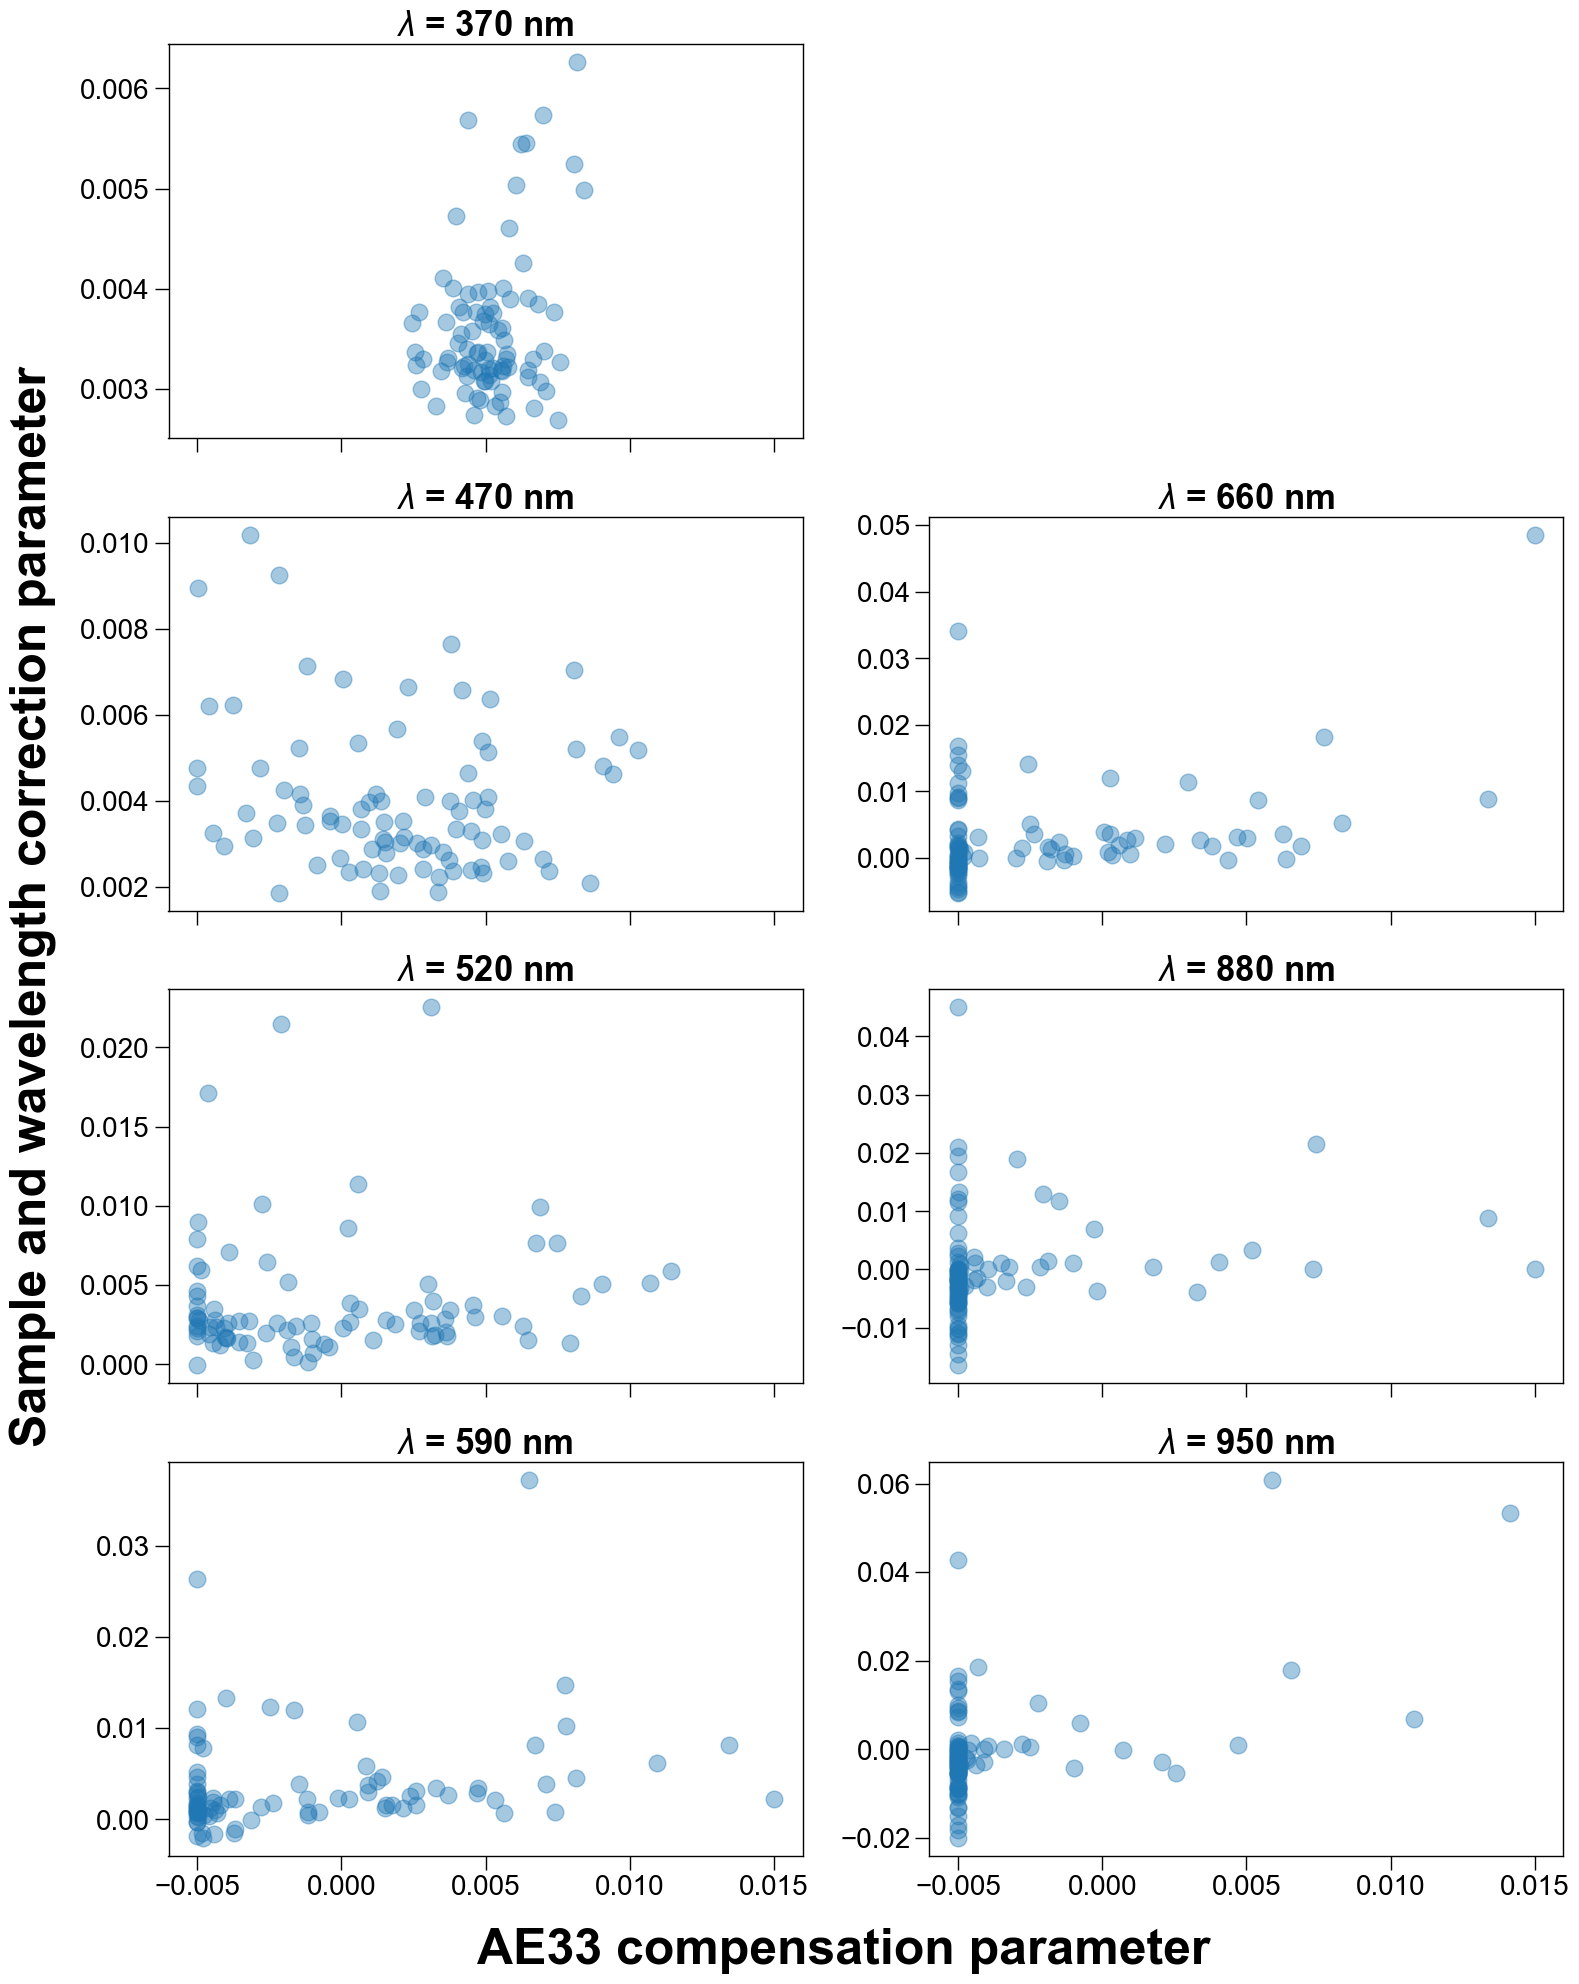

In [129]:
fig,ax = plt.subplots(4,2,figsize=(18,24),sharex='col')

ax[0,0].plot(ss.k1_mu,dfK['370'],'o',ms=12,alpha = alp)
ax[1,0].plot(ss.k2_mu,dfK['470'],'o',ms=12,alpha = alp)
ax[2,0].plot(ss.k3_mu,dfK['520'],'o',ms=12,alpha = alp)
ax[3,0].plot(ss.k4_mu,dfK['590'],'o',ms=12,alpha = alp)
ax[0,1].axis(False)
ax[1,1].plot(ss.k5_mu,dfK['660'],'o',ms=12,alpha = alp)
ax[2,1].plot(ss.k6_mu,dfK['880'],'o',ms=12,alpha = alp)
ax[3,1].plot(ss.k7_mu,dfK['950'],'o',ms=12,alpha = alp)

#titles
ax[0,0].set_title('$\lambda$ = {} nm'.format(wl[0]),fontsize=25,fontweight = 'bold')
ax[1,0].set_title('$\lambda$ = {} nm'.format(wl[1]),fontsize=25,fontweight = 'bold')
ax[2,0].set_title('$\lambda$ = {} nm'.format(wl[2]),fontsize=25,fontweight = 'bold')
ax[3,0].set_title('$\lambda$ = {} nm'.format(wl[3]),fontsize=25,fontweight = 'bold')
ax[1,1].set_title('$\lambda$ = {} nm'.format(wl[4]),fontsize=25,fontweight = 'bold')
ax[2,1].set_title('$\lambda$ = {} nm'.format(wl[5]),fontsize=25,fontweight = 'bold')
ax[3,1].set_title('$\lambda$ = {} nm'.format(wl[6]),fontsize=25,fontweight = 'bold')

fig.text(0.05, 0.3,'Sample and wavelength correction parameter', ha='center',rotation='vertical',fontsize = 36,fontweight = 'bold')
fig.text(0.5, 0.08,'AE33 compensation parameter', ha='center',fontsize = 36,fontweight = 'bold')

#fig.savefig('compParamScatter.png')